In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from experiments.data_loading import KEYS
from matplotlib.lines import Line2D

Define a datamodel

In [3]:
d = 100

In [4]:
vanilla_gaussian_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
}

vanilla_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=vanilla_gaussian_kwargs,
    name="vanilla-gaussian"
)

Define an experiment

In [5]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=5,
    alphas=np.logspace(-0.2,2,10),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [vanilla_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.PerturbedLogistic,
    gamma_fair_error=0.01,
    name="perturbed_logistic"
)
experiment_json = experiment.to_json()

In [6]:
with open("perturbed_logistic.json", "w") as f:
    f.write(experiment_json)

In [7]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

2025-02-28 18:32:35,896 - Rank 0 - INFO - The MPI comm size is 5
2025-02-28 18:32:35,896 - Rank 0 - INFO - This process has rank 0
2025-02-28 18:32:35,896 - Rank 0 - INFO - Starting Master for experiment perturbed_logistic
2025-02-28 18:32:35,896 - Rank 0 - INFO - Starting Experiment perturbed_logistic


INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment perturbed_logistic
INFO:root:Starting Experiment perturbed_logistic
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:This process has rank 3
INFO:root:This process has rank 4
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Starting task 2
INFO:root:Starting task 3
INFO:root:Starting task 4
INFO:root:Initializing data model
INFO:root:Initializing data model
INFO:root:Initializing data model
INFO:root:Initializing data model


2025-02-28 18:32:36,151 - Rank 0 - INFO - Starting all processes
2025-02-28 18:32:36,151 - Rank 0 - INFO - Sending task 0 to 1
2025-02-28 18:32:36,153 - Rank 0 - INFO - Sending task 1 to 2
2025-02-28 18:32:36,153 - Rank 0 - INFO - Sending task 2 to 3
2025-02-28 18:32:36,153 - Rank 0 - INFO - Sending task 3 to 4
2025-02-28 18:32:36,153 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-28 18:32:36,153 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:38,273 - Rank 0 - INFO - Received task 1 from 1
2025-02-28 18:32:38,273 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668ec7d0>)
2025-02-28 18:32:38,274 - Rank 0 - INFO - Received the 1th task
2025-02-28 18:32:38,429 - Rank 0 - INFO - Received task 3 from 3
2025-02-28 18:32:38,429 - Rank 0 - INFO - Sa

INFO:root:Finished State Evolution Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kw

2025-02-28 18:32:38,690 - Rank 0 - INFO - Received task 4 from 4
2025-02-28 18:32:38,690 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668ed750>)
2025-02-28 18:32:38,691 - Rank 0 - INFO - Received the 4th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:39,499 - Rank 0 - INFO - Received task 5 from 1
2025-02-28 18:32:39,499 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668edc90>)
2025-02-28 18:32:39,499 - Rank 0 - INFO - Received the 5th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:40,057 - Rank 0 - INFO - Received task 7 from 2
2025-02-28 18:32:40,057 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668edf50>)
2025-02-28 18:32:40,057 - Rank 0 - INFO - Received the 6th task
2025-02-28 18:32:40,104 - Rank 0 - INFO - Received task 6 from 3
2025-02-28 18:32:40,104 - Rank 0 - INFO - Sav

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:40,564 - Rank 0 - INFO - Received task 8 from 4
2025-02-28 18:32:40,564 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668ee8d0>)
2025-02-28 18:32:40,564 - Rank 0 - INFO - Received the 8th task


INFO:root:Finished State Evolution Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 9 from 1
INFO:root:Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kw

2025-02-28 18:32:40,806 - Rank 0 - INFO - Received task 9 from 1
2025-02-28 18:32:40,806 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668eedd0>)
2025-02-28 18:32:40,806 - Rank 0 - INFO - Received the 9th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:41,735 - Rank 0 - INFO - Received task 10 from 2
2025-02-28 18:32:41,735 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668ef390>)
2025-02-28 18:32:41,735 - Rank 0 - INFO - Received the 10th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:42,007 - Rank 0 - INFO - Received task 11 from 3
2025-02-28 18:32:42,007 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668ef810>)
2025-02-28 18:32:42,007 - Rank 0 - INFO - Received the 11th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:42,627 - Rank 0 - INFO - Received task 13 from 1
2025-02-28 18:32:42,627 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668efb90>)
2025-02-28 18:32:42,627 - Rank 0 - INFO - Received the 12th task
2025-02-28 18:32:42,791 - Rank 0 - INFO - Received task 12 from 4
2025-02-28 18:32:42,798 - Rank 0 - INFO 

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:43,200 - Rank 0 - INFO - Received task 14 from 2
2025-02-28 18:32:43,202 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166908790>)
2025-02-28 18:32:43,202 - Rank 0 - INFO - Received the 14th task


INFO:root:Finished State Evolution Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 15 from 3
INFO:root:Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:32:43,524 - Rank 0 - INFO - Received task 15 from 3
2025-02-28 18:32:43,528 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166908950>)
2025-02-28 18:32:43,534 - Rank 0 - INFO - Received the 15th task
2025-02-28 18:32:43,722 - Rank 0 - INFO - Received task 17 from 4
2025-02-28 18:32:43,722 - Rank 0 - INFO 

INFO:root:Norm Σ_x: 100.0
INFO:root:Received task 17 from 4
INFO:root:Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166908d10>)
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
  7%|▋         | 16/240 [00:07<01:13,  3.06it/s]INFO:root:Received the 16th task
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. 

2025-02-28 18:32:45,001 - Rank 0 - INFO - Received task 16 from 1
2025-02-28 18:32:45,001 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166909190>)
2025-02-28 18:32:45,001 - Rank 0 - INFO - Received the 17th task
2025-02-28 18:32:45,212 - Rank 0 - INFO - Received task 18 from 2
2025-02-28 18:32:45,212 - Rank 0 - INFO 

INFO:root:Received task 16 from 1
INFO:root:Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166909190>)
  7%|▋         | 17/240 [00:08<02:15,  1.64it/s]INFO:root:Received the 17th task
INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsi

2025-02-28 18:32:46,720 - Rank 0 - INFO - Received task 19 from 3
2025-02-28 18:32:46,721 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166909fd0>)
2025-02-28 18:32:46,721 - Rank 0 - INFO - Received the 20th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:47,524 - Rank 0 - INFO - Received task 21 from 1
2025-02-28 18:32:47,524 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690a510>)
2025-02-28 18:32:47,524 - Rank 0 - INFO - Received the 21th task


INFO:root:Finished State Evolution Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 24 from 3
INFO:root:Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:32:48,166 - Rank 0 - INFO - Received task 24 from 3
2025-02-28 18:32:48,166 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690aa50>)
2025-02-28 18:32:48,167 - Rank 0 - INFO - Received the 22th task


INFO:root:Finished State Evolution Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 23 from 4
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:32:48,406 - Rank 0 - INFO - Received task 23 from 4
2025-02-28 18:32:48,406 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690ae50>)
2025-02-28 18:32:48,406 - Rank 0 - INFO - Received the 23th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:50,085 - Rank 0 - INFO - Received task 27 from 4
2025-02-28 18:32:50,085 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690b2d0>)
2025-02-28 18:32:50,085 - Rank 0 - INFO - Received the 24th task
2025-02-28 18:32:50,277 - Rank 0 - INFO - Received task 22 from 2
2025-02-28 18:32:50,321 - Rank 0 - INFO 

INFO:root:Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690b750>)
 10%|█         | 25/240 [00:14<02:27,  1.45it/s]INFO:root:Received the 25th task
INFO:root:Starting task 29
INFO:root:Initializing data model
INFO:root:iter_nb: 500, err: 0.007733652198652408
INFO:root:error: 0.007733652198652408
INFO:root:d: 100
INFO:root:normalize_ma

2025-02-28 18:32:50,972 - Rank 0 - INFO - Received task 25 from 1
2025-02-28 18:32:50,973 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668e3c50>)
2025-02-28 18:32:50,979 - Rank 0 - INFO - Received the 26th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:51,944 - Rank 0 - INFO - Received task 28 from 4
2025-02-28 18:32:51,949 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690ad50>)
2025-02-28 18:32:51,951 - Rank 0 - INFO - Received the 27th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:53,165 - Rank 0 - INFO - Received task 26 from 3
2025-02-28 18:32:53,165 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1668c8090>)
2025-02-28 18:32:53,165 - Rank 0 - INFO - Received the 28th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:53,896 - Rank 0 - INFO - Received task 31 from 4
2025-02-28 18:32:53,897 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1669188d0>)
2025-02-28 18:32:53,901 - Rank 0 - INFO - Received the 29th task


INFO:root:Finished State Evolution Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 32 from 3
INFO:root:Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:32:54,564 - Rank 0 - INFO - Received task 32 from 3
2025-02-28 18:32:54,564 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166918ed0>)
2025-02-28 18:32:54,565 - Rank 0 - INFO - Received the 30th task


INFO:root:iter_nb: 1000, err: 0.0021549776917026975
INFO:root:error: 0.0021549776917026975
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0.

2025-02-28 18:32:55,944 - Rank 0 - INFO - Received task 30 from 1
2025-02-28 18:32:55,945 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166909010>)
2025-02-28 18:32:55,945 - Rank 0 - INFO - Received the 31th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:32:56,977 - Rank 0 - INFO - Received task 29 from 2
2025-02-28 18:32:56,989 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166919410>)
2025-02-28 18:32:56,992 - Rank 0 - INFO - Received the 32th task


 13%|█▎        | 32/240 [00:20<03:26,  1.01it/s]INFO:root:Received the 32th task
INFO:root:Starting task 36
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0

2025-02-28 18:32:57,636 - Rank 0 - INFO - Received task 36 from 2
2025-02-28 18:32:57,636 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166919810>)
2025-02-28 18:32:57,637 - Rank 0 - INFO - Received the 33th task
2025-02-28 18:32:57,735 - Rank 0 - INFO - Received task 35 from 1
2025-02-28 18:32:57,735 - Rank 0 - INFO 

INFO:root:Received task 36 from 2
INFO:root:Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166919810>)
 14%|█▍        | 33/240 [00:21<03:03,  1.13it/s]INFO:root:Received the 33th task
INFO:root:Finished State Evolution Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsi

2025-02-28 18:32:59,204 - Rank 0 - INFO - Received task 34 from 3
2025-02-28 18:32:59,205 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16690a010>)
2025-02-28 18:32:59,205 - Rank 0 - INFO - Received the 35th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:33:00,639 - Rank 0 - INFO - Received task 39 from 3
2025-02-28 18:33:00,639 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16691a390>)
2025-02-28 18:33:00,640 - Rank 0 - INFO - Received the 36th task


INFO:root:Received task 39 from 3
INFO:root:Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16691a390>)
 15%|█▌        | 36/240 [00:24<03:21,  1.01it/s]INFO:root:Received the 36th task
INFO:root:Finished State Evolution Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau

2025-02-28 18:33:01,808 - Rank 0 - INFO - Received task 40 from 3
2025-02-28 18:33:01,808 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16691a7d0>)
2025-02-28 18:33:01,809 - Rank 0 - INFO - Received the 37th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:33:02,359 - Rank 0 - INFO - Received task 38 from 1
2025-02-28 18:33:02,383 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x11f69ad90>)
2025-02-28 18:33:02,383 - Rank 0 - INFO - Received the 38th task


INFO:root:{'lambda_twiddle_1': 0.06746955362538279, 'lambda_twiddle_2': 0.0001375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished State Evolution Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambd

2025-02-28 18:33:02,753 - Rank 0 - INFO - Received task 33 from 4
2025-02-28 18:33:02,753 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16691b050>)
2025-02-28 18:33:02,753 - Rank 0 - INFO - Received the 39th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Starting task 43
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:33:04,654 - Rank 0 - INFO - Received task 42 from 1
2025-02-28 18:33:04,654 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691b190>)
2025-02-28 18:33:04,668 - Rank 0 - INFO - Received the 40th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeatures

2025-02-28 18:33:05,365 - Rank 0 - INFO - Received task 41 from 3
2025-02-28 18:33:05,367 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690aa90>)
2025-02-28 18:33:05,367 - Rank 0 - INFO - Received the 41th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:33:06,756 - Rank 0 - INFO - Received task 43 from 4
2025-02-28 18:33:06,757 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e37d0>)
2025-02-28 18:33:06,757 - Rank 0 - INFO - Received the 42th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:33:08,986 - Rank 0 - INFO - Received task 44 from 1
2025-02-28 18:33:08,986 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e3a90>)
2025-02-28 18:33:08,986 - Rank 0 - INFO - Received the 43th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:33:10,985 - Rank 0 - INFO - Received task 45 from 3
2025-02-28 18:33:10,985 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690be90>)
2025-02-28 18:33:10,985 - Rank 0 - INFO - Received the 44th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.006419213005934529, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1.

2025-02-28 18:33:12,644 - Rank 0 - INFO - Received task 46 from 4
2025-02-28 18:33:12,649 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec110>)
2025-02-28 18:33:12,649 - Rank 0 - INFO - Received the 45th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0.

2025-02-28 18:33:14,865 - Rank 0 - INFO - Received task 47 from 1
2025-02-28 18:33:14,908 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166934490>)
2025-02-28 18:33:14,908 - Rank 0 - INFO - Received the 46th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.

2025-02-28 18:33:15,887 - Rank 0 - INFO - Received task 48 from 3
2025-02-28 18:33:15,887 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec190>)
2025-02-28 18:33:15,888 - Rank 0 - INFO - Received the 47th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6545412079906695, 'lambda_twiddle_2': 0.0012500000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5757243055201348, 'lambda_twiddle_2': 0.0011250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.32998561376982677, 'lambda_twiddle_2': 0.0007125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 

2025-02-28 18:33:19,036 - Rank 0 - INFO - Received task 49 from 4
2025-02-28 18:33:19,045 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec110>)
2025-02-28 18:33:19,045 - Rank 0 - INFO - Received the 48th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:33:20,565 - Rank 0 - INFO - Received task 37 from 2
2025-02-28 18:33:20,565 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x166934d10>)
2025-02-28 18:33:20,565 - Rank 0 - INFO - Received the 49th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5505208000120178, 'lambda_twiddle_2': 0.004275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3853965695904269, 'lambda_twiddle_2': 0.00315}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.25196380858656947, 'lambda_twiddle_2': 0.0024749999999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.10075546721603133, 'lambda_twiddle_2': 0.00135}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.045385411907074416, 'lambda_twiddle_2': 0.0009}
INFO:root:{'lambda_twiddle_1': 0.

2025-02-28 18:33:23,733 - Rank 0 - INFO - Received task 50 from 1
2025-02-28 18:33:23,733 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec490>)
2025-02-28 18:33:23,733 - Rank 0 - INFO - Received the 50th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:33:27,125 - Rank 0 - INFO - Received task 51 from 3
2025-02-28 18:33:27,125 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935110>)
2025-02-28 18:33:27,126 - Rank 0 - INFO - Received the 51th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.2130165680867304, 'lambda_twiddle_2': 0.0022500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7568455169433731, 'lambda_twiddle_2': 0.0015625000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.14669706857578108, 'lambda_twiddle_2': 0.00033750000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.12731636875704808, 'lambda_twiddle_2': 0.00031250000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.07187935004410453, 'lambda_twiddle_2': 0.00017500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 

2025-02-28 18:33:33,244 - Rank 0 - INFO - Received task 52 from 4
2025-02-28 18:33:33,244 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935510>)
2025-02-28 18:33:33,244 - Rank 0 - INFO - Received the 52th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006135949361933854, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twidd

2025-02-28 18:33:37,143 - Rank 0 - INFO - Received task 53 from 2
2025-02-28 18:33:37,143 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1669359d0>)
2025-02-28 18:33:37,143 - Rank 0 - INFO - Received the 53th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.758404757480775, 'lambda_twiddle_2': 0.005849999999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6685928018257233, 'lambda_twiddle_2': 0.006075}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5471229601087539, 'lambda_twiddle_2': 0.005625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.44831826886546466, 'lambda_twiddle_2': 0.0054}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3596287373871611, 'lambda_twiddle_2': 0.005175}
INFO:root:{'lambda_twiddle_1': 0.0, 

2025-02-28 18:33:41,057 - Rank 0 - INFO - Received task 54 from 1
2025-02-28 18:33:41,057 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935650>)
2025-02-28 18:33:41,057 - Rank 0 - INFO - Received the 54th task


INFO:root:{'lambda_twiddle_1': 0.2174184090746205, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21742218758830184, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21740139240254874, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21740269555641828, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21740107568467965, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21739798181215075, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lam

2025-02-28 18:33:43,420 - Rank 0 - INFO - Received task 56 from 4
2025-02-28 18:33:43,420 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935e10>)
2025-02-28 18:33:43,421 - Rank 0 - INFO - Received the 55th task


INFO:root:Finished ERM Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 55 from 3
INFO:root:Saved Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:33:43,737 - Rank 0 - INFO - Received task 55 from 3
2025-02-28 18:33:43,737 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1669360d0>)
2025-02-28 18:33:43,737 - Rank 0 - INFO - Received the 56th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.228377625832239, 'lambda_twiddle_2': 0.004225000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.021682079533838, 'lambda_twiddle_2': 0.0039250000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.1864156375155444, 'lambda_twiddle_2': 0.0025000000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.29220498091062663, 'lambda_twiddle_2': 0.0006625000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x

2025-02-28 18:33:52,054 - Rank 0 - INFO - Received task 57 from 2
2025-02-28 18:33:52,054 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1669364d0>)
2025-02-28 18:33:52,055 - Rank 0 - INFO - Received the 57th task


INFO:root:{'lambda_twiddle_1': 0.6340813214318279, 'lambda_twiddle_2': 0.0091125}
INFO:root:{'lambda_twiddle_1': 0.04945449411292806, 'lambda_twiddle_2': 0.00026250000000000004}
INFO:root:{'lambda_twiddle_1': 0.6340763560488338, 'lambda_twiddle_2': 0.0091125}
INFO:root:{'lambda_twiddle_1': 0.1897441069851919, 'lambda_twiddle_2': 0.0023000000000000004}
INFO:root:{'lambda_twiddle_1': 0.049455908581487254, 'lambda_twiddle_2': 0.00026250000000000004}
INFO:root:{'lambda_twiddle_1': 0.18974428380388975, 'lambda_twiddle_2': 0.0023000000000000004}
INFO:root:{'lambda_twiddle_1': 0.04945327193157068, 'lambda_twiddle_2': 0.00026250000000000004}
INFO:root:{'lambda_twiddle_1': 0.1897443806827634, 'lambda_twiddle_2': 0.0023000000000000004}
INFO:root:{'lambda_twiddle_1': 0.049453891122939124, 'lambda_twiddle_2': 0.00026250000000000004}
INFO:root:{'lambda_twiddle_1': 0.18974433152802977, 'lambda_twiddle_2': 0.0023000000000000004}
INFO:root:{'lambda_twiddle_1': 0.04945398201369969, 'lambda_twiddle_2': 

2025-02-28 18:33:53,694 - Rank 0 - INFO - Received task 60 from 3
2025-02-28 18:33:53,709 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ee8d0>)
2025-02-28 18:33:53,763 - Rank 0 - INFO - Received the 58th task


INFO:root:Finished ERM Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 59 from 4
INFO:root:Saved Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, 

2025-02-28 18:33:54,013 - Rank 0 - INFO - Received task 59 from 4
2025-02-28 18:33:54,013 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935c90>)
2025-02-28 18:33:54,014 - Rank 0 - INFO - Received the 59th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:33:54,614 - Rank 0 - INFO - Received task 58 from 1
2025-02-28 18:33:54,614 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668eee90>)
2025-02-28 18:33:54,626 - Rank 0 - INFO - Received the 60th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:34:02,570 - Rank 0 - INFO - Received task 63 from 4
2025-02-28 18:34:02,604 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1661e7150>)
2025-02-28 18:34:02,605 - Rank 0 - INFO - Received the 61th task


INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.76619287939259, 'lambda_twiddle_2': 0.021262499999999997}
INFO:root:{'lambda_twiddle_1': 0.09335813864440637, 'lambda_twiddle_2': 0.0005250000000000001}
INFO:root:{'lambda_twiddle_1': 0.09334824567681962, 'lambda_twiddle_2': 0.0005250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09334724099422914, 'lambda_twiddle_2': 0.0005250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09334711146449529, 'lambda_twiddle_2': 0.0005250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0

2025-02-28 18:34:03,702 - Rank 0 - INFO - Received task 64 from 1
2025-02-28 18:34:03,702 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166937550>)
2025-02-28 18:34:03,702 - Rank 0 - INFO - Received the 62th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 62 from 3
INFO:root:Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.0

2025-02-28 18:34:04,332 - Rank 0 - INFO - Received task 62 from 3
2025-02-28 18:34:04,332 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166937810>)
2025-02-28 18:34:04,332 - Rank 0 - INFO - Received the 63th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:34:05,109 - Rank 0 - INFO - Received task 61 from 2
2025-02-28 18:34:05,117 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668efc10>)
2025-02-28 18:34:05,117 - Rank 0 - INFO - Received the 64th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:34:13,462 - Rank 0 - INFO - Received task 68 from 2
2025-02-28 18:34:13,462 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166937d50>)
2025-02-28 18:34:13,462 - Rank 0 - INFO - Received the 65th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 67 from 3
INFO:root:Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915,

2025-02-28 18:34:13,917 - Rank 0 - INFO - Received task 67 from 3
2025-02-28 18:34:13,917 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa02d0>)
2025-02-28 18:34:13,925 - Rank 0 - INFO - Received the 66th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 66 from 1
INFO:root:Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.0

2025-02-28 18:34:14,232 - Rank 0 - INFO - Received task 66 from 1
2025-02-28 18:34:14,232 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0650>)
2025-02-28 18:34:14,232 - Rank 0 - INFO - Received the 67th task


INFO:root:Finished ERM Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 65 from 4
INFO:root:Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:15,154 - Rank 0 - INFO - Received task 65 from 4
2025-02-28 18:34:15,154 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e0950>)
2025-02-28 18:34:15,154 - Rank 0 - INFO - Received the 68th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:34:23,847 - Rank 0 - INFO - Received task 71 from 1
2025-02-28 18:34:23,847 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0cd0>)
2025-02-28 18:34:23,848 - Rank 0 - INFO - Received the 69th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 72 from 4
INFO:root:Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.0

2025-02-28 18:34:24,186 - Rank 0 - INFO - Received task 72 from 4
2025-02-28 18:34:24,186 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0e50>)
2025-02-28 18:34:24,187 - Rank 0 - INFO - Received the 70th task


INFO:root:Finished ERM Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 70 from 3
INFO:root:Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:24,673 - Rank 0 - INFO - Received task 70 from 3
2025-02-28 18:34:24,673 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0f10>)
2025-02-28 18:34:24,673 - Rank 0 - INFO - Received the 71th task


INFO:root:Finished ERM Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 69 from 2
INFO:root:Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:25,312 - Rank 0 - INFO - Received task 69 from 2
2025-02-28 18:34:25,319 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166909490>)
2025-02-28 18:34:25,330 - Rank 0 - INFO - Received the 72th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:34:34,194 - Rank 0 - INFO - Received task 76 from 2
2025-02-28 18:34:34,195 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166919810>)
2025-02-28 18:34:34,195 - Rank 0 - INFO - Received the 73th task


INFO:root:Finished ERM Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 75 from 3
INFO:root:Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:34,430 - Rank 0 - INFO - Received task 75 from 3
2025-02-28 18:34:34,430 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0950>)
2025-02-28 18:34:34,430 - Rank 0 - INFO - Received the 74th task
2025-02-28 18:34:34,581 - Rank 0 - INFO - Received task 74 from 4
2025-02-28 18:34:34,58

INFO:root:Finished ERM Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 73 from 1
INFO:root:Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:34,972 - Rank 0 - INFO - Received task 73 from 1
2025-02-28 18:34:34,972 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690a0d0>)
2025-02-28 18:34:34,973 - Rank 0 - INFO - Received the 76th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:34:44,675 - Rank 0 - INFO - Received task 80 from 1
2025-02-28 18:34:44,675 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166919c50>)
2025-02-28 18:34:44,676 - Rank 0 - INFO - Received the 77th task


INFO:root:Finished ERM Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 77 from 2
INFO:root:Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_fea

2025-02-28 18:34:45,829 - Rank 0 - INFO - Received task 77 from 2
2025-02-28 18:34:45,830 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691a510>)
2025-02-28 18:34:45,830 - Rank 0 - INFO - Received the 78th task
2025-02-28 18:34:45,913 - Rank 0 - INFO - Received task 79 from 4
2025-02-28 18:34:45,913 - Rank 0 - 

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:34:52,442 - Rank 0 - INFO - Received task 81 from 1
2025-02-28 18:34:52,442 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa2b50>)
2025-02-28 18:34:52,442 - Rank 0 - INFO - Received the 81th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:34:54,222 - Rank 0 - INFO - Received task 82 from 2
2025-02-28 18:34:54,222 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa30d0>)
2025-02-28 18:34:54,222 - Rank 0 - INFO - Received the 82th task
2025-02-28 18:34:54,388 - Rank 0 - INFO - Received task 83 from 4
2025-02-28 18:34:54,39

INFO:root:Finished ERM Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 83 from 4
INFO:root:Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True

2025-02-28 18:34:54,495 - Rank 0 - INFO - Received task 84 from 3
2025-02-28 18:34:54,495 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa36d0>)
2025-02-28 18:34:54,495 - Rank 0 - INFO - Received the 84th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1

2025-02-28 18:35:03,007 - Rank 0 - INFO - Received task 85 from 1
2025-02-28 18:35:03,007 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e3a50>)
2025-02-28 18:35:03,019 - Rank 0 - INFO - Received the 85th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:35:06,045 - Rank 0 - INFO - Received task 86 from 2
2025-02-28 18:35:06,045 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690bc50>)
2025-02-28 18:35:06,045 - Rank 0 - INFO - Received the 86th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:35:08,906 - Rank 0 - INFO - Received task 88 from 3
2025-02-28 18:35:08,914 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690a550>)
2025-02-28 18:35:08,914 - Rank 0 - INFO - Received the 87th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 87 from 4
INFO:root:Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<

2025-02-28 18:35:09,549 - Rank 0 - INFO - Received task 87 from 4
2025-02-28 18:35:09,550 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8210>)
2025-02-28 18:35:09,550 - Rank 0 - INFO - Received the 88th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6984937862618423, 'lambda_twiddle_2': 0.0013000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6230337810179669, 'lambda_twiddle_2': 0.0011875000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3698421013226359, 'lambda_twiddle_2': 0.0007625000000000002}
INFO:root:{'lambda_twiddle_1': 0.08254784024629863, 'lambda_twiddle_2': 0.00017500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 

2025-02-28 18:35:15,922 - Rank 0 - INFO - Received task 89 from 1
2025-02-28 18:35:15,923 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8390>)
2025-02-28 18:35:15,923 - Rank 0 - INFO - Received the 89th task


INFO:root:{'lambda_twiddle_1': -0.0649657363941538, 'lambda_twiddle_2': 0.0005625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.0687146236214058, 'lambda_twiddle_2': 0.0005625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03765931538695716, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03668604988150405, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03606461143087787, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0

2025-02-28 18:35:22,361 - Rank 0 - INFO - Received task 90 from 2
2025-02-28 18:35:22,361 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab85d0>)
2025-02-28 18:35:22,361 - Rank 0 - INFO - Received the 90th task


INFO:root:{'lambda_twiddle_1': -0.03923092520667511, 'lambda_twiddle_2': 0.0003375}
INFO:root:Starting task 94
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.039204868767176285, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03918992409049267, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.039189581214000305, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03918971469090905, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1'

2025-02-28 18:35:25,755 - Rank 0 - INFO - Received task 91 from 3
2025-02-28 18:35:25,755 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8c50>)
2025-02-28 18:35:25,755 - Rank 0 - INFO - Received the 91th task


INFO:root:{'lambda_twiddle_1': -0.03920970366238888, 'lambda_twiddle_2': 0.0003375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15348028456970225, 'lambda_twiddle_2': 0.00036250000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08850147574070073, 'lambda_twiddle_2': 0.00021250000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.06739089867865453, 'lambda_twiddle_2': 0.00015000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.030882433354163786, 'lambda_twiddle_2': 7.500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_again

2025-02-28 18:35:27,220 - Rank 0 - INFO - Received task 92 from 4
2025-02-28 18:35:27,220 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8f10>)
2025-02-28 18:35:27,221 - Rank 0 - INFO - Received the 92th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.007356860978471029, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0

2025-02-28 18:35:31,939 - Rank 0 - INFO - Received task 93 from 1
2025-02-28 18:35:31,940 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8390>)
2025-02-28 18:35:31,940 - Rank 0 - INFO - Received the 93th task


INFO:root:{'lambda_twiddle_1': -0.025361376851805964, 'lambda_twiddle_2': 0.00035000000000000005}
INFO:root:{'lambda_twiddle_1': 0.5230002882665545, 'lambda_twiddle_2': 0.005175}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.014503879882033631, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.4791249662447632, 'lambda_twiddle_2': 0.0052875}
INFO:root:{'lambda_twiddle_1': -0.014803448105808907, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.4291291095697815, 'lambda_twiddle_2': 0.0055125}
INFO:root:{'lambda_twiddle_1': -0.01582072075310046, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3507435298335058, 'lambda_twiddle_2': 0.0050625}
INFO:root:{'lambda_twiddle_1': -0.011327412518621995, 'lambda_twiddle_2': 0.00015000000000000004}
I

2025-02-28 18:35:38,867 - Rank 0 - INFO - Received task 96 from 4
2025-02-28 18:35:38,867 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab9350>)
2025-02-28 18:35:38,867 - Rank 0 - INFO - Received the 94th task


INFO:root:Starting task 98
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': -0.018526207348546812, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:Finished ERM Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:

2025-02-28 18:35:39,095 - Rank 0 - INFO - Received task 94 from 2
2025-02-28 18:35:39,096 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab9650>)
2025-02-28 18:35:39,102 - Rank 0 - INFO - Received the 95th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01852105076069417, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.018519316242024263, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01851583472475362, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.018515635835779358, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.018515750766333272, 'lambda_twiddle_2': 0.00020000000000000004}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:35:42,844 - Rank 0 - INFO - Received task 95 from 3
2025-02-28 18:35:42,844 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab9890>)
2025-02-28 18:35:42,845 - Rank 0 - INFO - Received the 96th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.22391538331637456, 'lambda_twiddle_2': 0.0005375000000000001}
INFO:root:{'lambda_twiddle_1': 3.9770836967814533, 'lambda_twiddle_2': 0.015500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.20331508680205226, 'lambda_twiddle_2': 0.0005000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.4868819793132335, 'lambda_twiddle_2': 0.010850000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.13463095022718002, 'lambda_twiddle_2': 0.00036250000000000003}
INFO:root:{'lambda_twiddle_1': 0.6654560601670427, 'lambda_twiddle_2': 0.0032000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09131115813370587, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.

2025-02-28 18:35:47,110 - Rank 0 - INFO - Received task 97 from 1
2025-02-28 18:35:47,110 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8c50>)
2025-02-28 18:35:47,110 - Rank 0 - INFO - Received the 97th task


INFO:root:{'lambda_twiddle_1': 0.004172573185890673, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 1.4440890077600257, 'lambda_twiddle_2': 0.011587499999999999}
INFO:root:{'lambda_twiddle_1': 0.1333103094853807, 'lambda_twiddle_2': 0.0022}
INFO:root:{'lambda_twiddle_1': 0.004173677160196957, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 1.3113263059780307, 'lambda_twiddle_2': 0.011587499999999999}
INFO:root:{'lambda_twiddle_1': 0.004144170282614972, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.1323670212781663, 'lambda_twiddle_2': 0.0022500000000000003}
INFO:root:{'lambda_twiddle_1': 0.004137831632789978, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 1.0356122419125036, 'lambda_twiddle_2': 0.010125}
INFO:root:{'lambda_twiddle_1': 0.13241038792822896, 'lambda_twiddle_2': 0.0022500000000000003}
INFO:root:{'lambda_twiddle_1': 0.004126355427968392, 'lambda_twiddle_2': 5.000000

2025-02-28 18:35:50,956 - Rank 0 - INFO - Received task 99 from 2
2025-02-28 18:35:50,956 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166919f10>)
2025-02-28 18:35:50,956 - Rank 0 - INFO - Received the 98th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7392462006338499, 'lambda_twiddle_2': 0.0100125}
INFO:root:{'lambda_twiddle_1': 0.004150957157759774, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7392452747333328, 'lambda_twiddle_2': 0.0100125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.004151719113150366, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0041519461787674905, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, al

2025-02-28 18:35:52,517 - Rank 0 - INFO - Received task 100 from 3
2025-02-28 18:35:52,517 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x12f4f2250>)
2025-02-28 18:35:52,518 - Rank 0 - INFO - Received the 99th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:35:52,820 - Rank 0 - INFO - Received task 98 from 4
2025-02-28 18:35:52,820 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690a310>)
2025-02-28 18:35:52,820 - Rank 0 - INFO - Received the 100th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 

2025-02-28 18:36:00,921 - Rank 0 - INFO - Received task 101 from 1
2025-02-28 18:36:00,921 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab9fd0>)
2025-02-28 18:36:00,921 - Rank 0 - INFO - Received the 101th task


INFO:root:{'lambda_twiddle_1': 0.08845727002304898, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:{'lambda_twiddle_1': 0.6444672596488962, 'lambda_twiddle_2': 0.005600000000000001}
INFO:root:{'lambda_twiddle_1': 0.08845842448903331, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:{'lambda_twiddle_1': 0.08845816707348776, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:{'lambda_twiddle_1': 0.08845661569210334, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:Finished ERM Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition

2025-02-28 18:36:01,954 - Rank 0 - INFO - Received task 104 from 4
2025-02-28 18:36:01,954 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aba990>)
2025-02-28 18:36:01,954 - Rank 0 - INFO - Received the 102th task


INFO:root:{'lambda_twiddle_1': 0.08845615177179983, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:{'lambda_twiddle_1': 0.08845639227516057, 'lambda_twiddle_2': 0.00047500000000000005}
INFO:root:Finished ERM Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 103 from 3
INFO:root:Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_p

2025-02-28 18:36:02,576 - Rank 0 - INFO - Received task 103 from 3
2025-02-28 18:36:02,576 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690ae50>)
2025-02-28 18:36:02,576 - Rank 0 - INFO - Received the 103th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:03,241 - Rank 0 - INFO - Received task 102 from 2
2025-02-28 18:36:03,242 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690aa50>)
2025-02-28 18:36:03,242 - Rank 0 - INFO - Received the 104th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:12,411 - Rank 0 - INFO - Received task 108 from 2
2025-02-28 18:36:12,414 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690b350>)
2025-02-28 18:36:12,414 - Rank 0 - INFO - Received the 105th task
2025-02-28 18:36:12,414 - Rank 0 - INFO - Received task 107 from 3
2025-02-28 18:36:1

INFO:root:Finished ERM Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 106 from 4
INFO:root:Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:36:13,061 - Rank 0 - INFO - Received task 106 from 4
2025-02-28 18:36:13,062 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166abb9d0>)
2025-02-28 18:36:13,062 - Rank 0 - INFO - Received the 107th task


INFO:root:Finished ERM Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 105 from 1
INFO:root:Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:36:13,369 - Rank 0 - INFO - Received task 105 from 1
2025-02-28 18:36:13,369 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab8590>)
2025-02-28 18:36:13,381 - Rank 0 - INFO - Received the 108th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:21,931 - Rank 0 - INFO - Received task 112 from 1
2025-02-28 18:36:21,932 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691be90>)
2025-02-28 18:36:21,933 - Rank 0 - INFO - Received the 109th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 111 from 4
INFO:root:Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_ty

2025-02-28 18:36:22,533 - Rank 0 - INFO - Received task 111 from 4
2025-02-28 18:36:22,533 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e3b50>)
2025-02-28 18:36:22,533 - Rank 0 - INFO - Received the 110th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-02-28 18:36:23,066 - Rank 0 - INFO - Received task 110 from 3
2025-02-28 18:36:23,066 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690b350>)
2025-02-28 18:36:23,067 - Rank 0 - INFO - Received the 111th task


INFO:root:Received task 110 from 3
INFO:root:Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16690b350>)
 46%|████▋     | 111/240 [03:46<04:37,  2.15s/it]INFO:root:Received the 111th task
INFO:root:Starting task 115
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normaliz

2025-02-28 18:36:24,148 - Rank 0 - INFO - Received task 109 from 2
2025-02-28 18:36:24,148 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec690>)
2025-02-28 18:36:24,148 - Rank 0 - INFO - Received the 112th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:32,812 - Rank 0 - INFO - Received task 115 from 3
2025-02-28 18:36:32,812 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166934490>)
2025-02-28 18:36:32,813 - Rank 0 - INFO - Received the 113th task


INFO:root:Finished ERM Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_fe

2025-02-28 18:36:33,349 - Rank 0 - INFO - Received task 114 from 4
2025-02-28 18:36:33,349 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166908b90>)
2025-02-28 18:36:33,350 - Rank 0 - INFO - Received the 114th task
2025-02-28 18:36:33,350 - Rank 0 - INFO - Received task 113 from 1
2025-02-28 18:36:3

INFO:root:Finished ERM Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 116 from 2
INFO:root:Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:36:33,819 - Rank 0 - INFO - Received task 116 from 2
2025-02-28 18:36:33,831 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ed250>)
2025-02-28 18:36:33,831 - Rank 0 - INFO - Received the 116th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:43,321 - Rank 0 - INFO - Received task 120 from 2
2025-02-28 18:36:43,321 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad5510>)
2025-02-28 18:36:43,322 - Rank 0 - INFO - Received the 117th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 119 from 1
INFO:root:Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=Da

2025-02-28 18:36:43,829 - Rank 0 - INFO - Received task 119 from 1
2025-02-28 18:36:43,829 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ed7d0>)
2025-02-28 18:36:43,830 - Rank 0 - INFO - Received the 118th task


INFO:root:Finished ERM Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 118 from 4
INFO:root:Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_

2025-02-28 18:36:44,189 - Rank 0 - INFO - Received task 118 from 4
2025-02-28 18:36:44,193 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad5a90>)
2025-02-28 18:36:44,193 - Rank 0 - INFO - Received the 119th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:45,146 - Rank 0 - INFO - Received task 117 from 3
2025-02-28 18:36:45,147 - Rank 0 - INFO - Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935510>)
2025-02-28 18:36:45,147 - Rank 0 - INFO - Received the 120th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:36:51,504 - Rank 0 - INFO - Received task 121 from 2
2025-02-28 18:36:51,504 - Rank 0 - INFO - Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668edfd0>)
2025-02-28 18:36:51,504 - Rank 0 - INFO - Received the 121th task


INFO:root:Finished ERM Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 122 from 1
INFO:root:Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:36:51,745 - Rank 0 - INFO - Received task 122 from 1
2025-02-28 18:36:51,746 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad4f90>)
2025-02-28 18:36:51,746 - Rank 0 - INFO - Received the 122th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefi

2025-02-28 18:36:52,901 - Rank 0 - INFO - Received task 123 from 4
2025-02-28 18:36:52,901 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad6690>)
2025-02-28 18:36:52,906 - Rank 0 - INFO - Received the 123th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:36:54,164 - Rank 0 - INFO - Received task 124 from 3
2025-02-28 18:36:54,168 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166936150>)
2025-02-28 18:36:54,169 - Rank 0 - INFO - Received the 124th task


INFO:root:{'lambda_twiddle_1': 0.39023458505859954, 'lambda_twiddle_2': 0.0007000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0

2025-02-28 18:37:02,733 - Rank 0 - INFO - Received task 125 from 2
2025-02-28 18:37:02,733 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad6210>)
2025-02-28 18:37:02,733 - Rank 0 - INFO - Received the 125th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 126 from 1
INFO:root:Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_typ

2025-02-28 18:37:03,237 - Rank 0 - INFO - Received task 126 from 1
2025-02-28 18:37:03,237 - Rank 0 - INFO - Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668eee10>)
2025-02-28 18:37:03,237 - Rank 0 - INFO - Received the 126th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 

2025-02-28 18:37:05,812 - Rank 0 - INFO - Received task 127 from 4
2025-02-28 18:37:05,812 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad6b10>)
2025-02-28 18:37:05,813 - Rank 0 - INFO - Received the 127th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7426391755166489, 'lambda_twiddle_2': 0.0014000000000000002}
INFO:root:{'lambda_twiddle_1': 0.6480775358652924, 'lambda_twiddle_2': 0.0012500000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal':

2025-02-28 18:37:07,144 - Rank 0 - INFO - Received task 128 from 3
2025-02-28 18:37:07,145 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad7410>)
2025-02-28 18:37:07,145 - Rank 0 - INFO - Received the 128th task


INFO:root:{'lambda_twiddle_1': 0.037700368207564144, 'lambda_twiddle_2': 8.750000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.01961712148818719, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ...

2025-02-28 18:37:16,525 - Rank 0 - INFO - Received task 129 from 2
2025-02-28 18:37:16,525 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad7710>)
2025-02-28 18:37:16,525 - Rank 0 - INFO - Received the 129th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 130 from 1
INFO:root:S

2025-02-28 18:37:17,091 - Rank 0 - INFO - Received task 130 from 1
2025-02-28 18:37:17,137 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x12fe17a90>)
2025-02-28 18:37:17,175 - Rank 0 - INFO - Received the 130th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0.

2025-02-28 18:37:21,422 - Rank 0 - INFO - Received task 131 from 4
2025-02-28 18:37:21,422 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad7c10>)
2025-02-28 18:37:21,422 - Rank 0 - INFO - Received the 131th task


INFO:root:{'lambda_twiddle_1': 0.09993037181952151, 'lambda_twiddle_2': 0.00022500000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08496162842017524, 'lambda_twiddle_2': 0.00021250000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.03992808063204505, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.025387287125634955, 'lambda_twiddle_2': 7.500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.004155612569688772, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.007000736605887236, 'lambda_twiddle_2': 2.5000000000000005e

2025-02-28 18:37:25,148 - Rank 0 - INFO - Received task 132 from 3
2025-02-28 18:37:25,149 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166937f90>)
2025-02-28 18:37:25,156 - Rank 0 - INFO - Received the 132th task


INFO:root:{'lambda_twiddle_1': 0.3570751247132488, 'lambda_twiddle_2': 0.0017500000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.2743164559248532, 'lambda_twiddle_2': 0.0014000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.19780324683109934, 'lambda_twiddle_2': 0.0011}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.1540509141618842, 'lambda_twiddle_2': 0.0010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09104421748905667, 'lambda_twiddle_2': 0.0006500000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2':

2025-02-28 18:37:32,912 - Rank 0 - INFO - Received task 134 from 1
2025-02-28 18:37:32,912 - Rank 0 - INFO - Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ec390>)
2025-02-28 18:37:32,912 - Rank 0 - INFO - Received the 133th task


INFO:root:{'lambda_twiddle_1': -0.1447095814831345, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.00429021479583605, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.14576608783956124, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.004292387612668881, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.1447566388030841, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.0042932954818061305, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.14455192798207178, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.004296528279387984, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:Finished ERM Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_

2025-02-28 18:37:33,918 - Rank 0 - INFO - Received task 133 from 2
2025-02-28 18:37:33,918 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af4650>)
2025-02-28 18:37:33,918 - Rank 0 - INFO - Received the 134th task


INFO:root:{'lambda_twiddle_1': -0.00428280286144056, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.14451398391328107, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.004292096741976729, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.1447592713225196, 'lambda_twiddle_2': 0.0021375}
INFO:root:{'lambda_twiddle_1': -0.004295505466039368, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:d: 100
INFO:root:{'lambda_twiddle_1': -0.14496578305569185, 'lambda_twiddle_2': 0.0021375}
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 

2025-02-28 18:37:37,693 - Rank 0 - INFO - Received task 136 from 3
2025-02-28 18:37:37,693 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e0090>)
2025-02-28 18:37:37,694 - Rank 0 - INFO - Received the 135th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.17755248096284268, 'lambda_twiddle_2': 0.0004125000000000001}
INFO:root:{'lambda_twiddle_1': 0.17902109961958929, 'lambda_twiddle_2': 0.0004250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09360670191747779, 'lambda_twiddle_2': 0.00022500000000000005}
INFO:root:Finished ERM Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1

2025-02-28 18:37:38,459 - Rank 0 - INFO - Received task 135 from 4
2025-02-28 18:37:38,459 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af4650>)
2025-02-28 18:37:38,459 - Rank 0 - INFO - Received the 136th task


INFO:root:{'lambda_twiddle_1': 0.042939931938599525, 'lambda_twiddle_2': 0.0001375}
INFO:root:{'lambda_twiddle_1': 0.03913405664262068, 'lambda_twiddle_2': 0.00015000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.016465675623325394, 'lambda_twiddle_2': 7.500000000000002e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ

2025-02-28 18:37:47,657 - Rank 0 - INFO - Received task 140 from 4
2025-02-28 18:37:47,657 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af4e10>)
2025-02-28 18:37:47,657 - Rank 0 - INFO - Received the 137th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.002680411068640581, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.002680506500691038, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:Finished ERM Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.0

2025-02-28 18:37:48,204 - Rank 0 - INFO - Received task 139 from 3
2025-02-28 18:37:48,204 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5110>)
2025-02-28 18:37:48,205 - Rank 0 - INFO - Received the 138th task


INFO:root:{'lambda_twiddle_1': 0.002680666976902328, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:Finished ERM Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 137 from 1
INFO:root:Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_again

2025-02-28 18:37:49,095 - Rank 0 - INFO - Received task 137 from 1
2025-02-28 18:37:49,095 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ed490>)
2025-02-28 18:37:49,095 - Rank 0 - INFO - Received the 139th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Finished ERM Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 138 from 2
INFO:root:Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilon

2025-02-28 18:37:49,481 - Rank 0 - INFO - Received task 138 from 2
2025-02-28 18:37:49,481 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5690>)
2025-02-28 18:37:49,481 - Rank 0 - INFO - Received the 140th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:37:58,412 - Rank 0 - INFO - Received task 144 from 2
2025-02-28 18:37:58,412 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5a90>)
2025-02-28 18:37:58,412 - Rank 0 - INFO - Received the 141th task


INFO:root:{'lambda_twiddle_1': 0.048872228053324654, 'lambda_twiddle_2': 0.000275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.04887005336014539, 'lambda_twiddle_2': 0.000275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.04887109235318231, 'lambda_twiddle_2': 0.000275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.04887123514072116, 'lambda_twiddle_2': 0.000275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1

2025-02-28 18:37:59,436 - Rank 0 - INFO - Received task 143 from 1
2025-02-28 18:37:59,436 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ed750>)
2025-02-28 18:37:59,437 - Rank 0 - INFO - Received the 142th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:38:00,273 - Rank 0 - INFO - Received task 142 from 3
2025-02-28 18:38:00,273 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5f10>)
2025-02-28 18:38:00,273 - Rank 0 - INFO - Received the 143th task


INFO:root:Finished ERM Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 141 from 4
INFO:root:Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:38:00,936 - Rank 0 - INFO - Received task 141 from 4
2025-02-28 18:38:00,936 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af6290>)
2025-02-28 18:38:00,936 - Rank 0 - INFO - Received the 144th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:09,324 - Rank 0 - INFO - Received task 147 from 3
2025-02-28 18:38:09,324 - Rank 0 - INFO - Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5c90>)
2025-02-28 18:38:09,324 - Rank 0 - INFO - Received the 145th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 146 from 1
INFO:root:Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_ty

2025-02-28 18:38:10,102 - Rank 0 - INFO - Received task 146 from 1
2025-02-28 18:38:10,103 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668edf10>)
2025-02-28 18:38:10,103 - Rank 0 - INFO - Received the 146th task
2025-02-28 18:38:10,188 - Rank 0 - INFO - Received task 148 from 4
2025-02-28 18:38:1

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:11,478 - Rank 0 - INFO - Received task 145 from 2
2025-02-28 18:38:11,478 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ee550>)
2025-02-28 18:38:11,500 - Rank 0 - INFO - Received the 148th task


INFO:root:Starting task 152
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:ro

2025-02-28 18:38:19,438 - Rank 0 - INFO - Received task 151 from 4
2025-02-28 18:38:19,438 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad7050>)
2025-02-28 18:38:19,456 - Rank 0 - INFO - Received the 149th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 150 from 1
INFO:root:Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.4422607917163

2025-02-28 18:38:20,231 - Rank 0 - INFO - Received task 150 from 1
2025-02-28 18:38:20,231 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ed750>)
2025-02-28 18:38:20,247 - Rank 0 - INFO - Received the 150th task


INFO:root:Finished ERM Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 152 from 2
INFO:root:Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:38:20,590 - Rank 0 - INFO - Received task 152 from 2
2025-02-28 18:38:20,590 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af7450>)
2025-02-28 18:38:20,590 - Rank 0 - INFO - Received the 151th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:21,234 - Rank 0 - INFO - Received task 149 from 3
2025-02-28 18:38:21,234 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af7910>)
2025-02-28 18:38:21,234 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:30,180 - Rank 0 - INFO - Received task 156 from 3
2025-02-28 18:38:30,180 - Rank 0 - INFO - Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af74d0>)
2025-02-28 18:38:30,180 - Rank 0 - INFO - Received the 153th task


INFO:root:Finished ERM Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 155 from 2
INFO:root:Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:38:30,759 - Rank 0 - INFO - Received task 155 from 2
2025-02-28 18:38:30,759 - Rank 0 - INFO - Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668efe50>)
2025-02-28 18:38:30,760 - Rank 0 - INFO - Received the 154th task
2025-02-28 18:38:30,827 - Rank 0 - INFO - Received task 154 from 1
2025-02-28 18:38:3

INFO:root:Finished ERM Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 153 from 4
INFO:root:Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:38:31,037 - Rank 0 - INFO - Received task 153 from 4
2025-02-28 18:38:31,037 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e3850>)
2025-02-28 18:38:31,037 - Rank 0 - INFO - Received the 156th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:40,148 - Rank 0 - INFO - Received task 160 from 4
2025-02-28 18:38:40,155 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0650>)
2025-02-28 18:38:40,177 - Rank 0 - INFO - Received the 157th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 159 from 1
INFO:root:Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=Da

2025-02-28 18:38:40,869 - Rank 0 - INFO - Received task 159 from 1
2025-02-28 18:38:40,869 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b109d0>)
2025-02-28 18:38:40,869 - Rank 0 - INFO - Received the 158th task


INFO:root:Finished ERM Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 158 from 2
INFO:root:Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_

2025-02-28 18:38:41,462 - Rank 0 - INFO - Received task 158 from 2
2025-02-28 18:38:41,462 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b10bd0>)
2025-02-28 18:38:41,462 - Rank 0 - INFO - Received the 159th task


INFO:root:Finished ERM Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 157 from 3
INFO:root:Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_

2025-02-28 18:38:42,029 - Rank 0 - INFO - Received task 157 from 3
2025-02-28 18:38:42,030 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa09d0>)
2025-02-28 18:38:42,030 - Rank 0 - INFO - Received the 160th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:48,195 - Rank 0 - INFO - Received task 161 from 4
2025-02-28 18:38:48,195 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1665d8bd0>)
2025-02-28 18:38:48,195 - Rank 0 - INFO - Received the 161th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', descri

2025-02-28 18:38:48,816 - Rank 0 - INFO - Received task 162 from 1
2025-02-28 18:38:48,821 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b11490>)
2025-02-28 18:38:48,822 - Rank 0 - INFO - Received the 162th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.

2025-02-28 18:38:50,286 - Rank 0 - INFO - Received task 163 from 2
2025-02-28 18:38:50,287 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b11750>)
2025-02-28 18:38:50,287 - Rank 0 - INFO - Received the 163th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:38:51,000 - Rank 0 - INFO - Received task 164 from 3
2025-02-28 18:38:51,000 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166919a10>)
2025-02-28 18:38:51,001 - Rank 0 - INFO - Received the 164th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.38105093883937063, 'lambda_twiddle_2': 0.0007125}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0.

2025-02-28 18:38:59,934 - Rank 0 - INFO - Received task 165 from 4
2025-02-28 18:38:59,934 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166909750>)
2025-02-28 18:38:59,934 - Rank 0 - INFO - Received the 165th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 166 from 1
INFO:root:Sa

2025-02-28 18:39:00,270 - Rank 0 - INFO - Received task 166 from 1
2025-02-28 18:39:00,270 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166909c10>)
2025-02-28 18:39:00,274 - Rank 0 - INFO - Received the 166th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Finished ERM Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinitio

2025-02-28 18:39:00,496 - Rank 0 - INFO - Received task 167 from 2
2025-02-28 18:39:00,503 - Rank 0 - INFO - Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0650>)
2025-02-28 18:39:00,503 - Rank 0 - INFO - Received the 167th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:39:01,456 - Rank 0 - INFO - Received task 168 from 3
2025-02-28 18:39:01,456 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691a510>)
2025-02-28 18:39:01,460 - Rank 0 - INFO - Received the 168th task


INFO:root:Starting task 172
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7949547720336967, 'lambda_twiddle_2': 0.0014375000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7109761119460567, 'lambda_twiddle_2': 0.0013125000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.506999875734333, 'lambda_twiddle_2': 0.0056500000000000005}
INFO:root:{'lambda_twiddle_1': 0.46465445002915734, 'lambda_twiddle_2': 0.0009625000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.10578054109965085, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 1.3370540651933598, 'lambda_twiddle_2': 0.005100000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:ro

2025-02-28 18:39:07,952 - Rank 0 - INFO - Received task 169 from 4
2025-02-28 18:39:07,953 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691a7d0>)
2025-02-28 18:39:07,953 - Rank 0 - INFO - Received the 169th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:39:09,632 - Rank 0 - INFO - Received task 171 from 2
2025-02-28 18:39:09,632 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166abaa10>)
2025-02-28 18:39:09,632 - Rank 0 - INFO - Received the 170th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 170 from 1
INFO:root:Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_ty

2025-02-28 18:39:09,854 - Rank 0 - INFO - Received task 170 from 1
2025-02-28 18:39:09,854 - Rank 0 - INFO - Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b11e10>)
2025-02-28 18:39:09,854 - Rank 0 - INFO - Received the 171th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.

2025-02-28 18:39:13,091 - Rank 0 - INFO - Received task 172 from 3
2025-02-28 18:39:13,091 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b12e90>)
2025-02-28 18:39:13,094 - Rank 0 - INFO - Received the 172th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.05715017142569035, 'lambda_twiddle_2': 0.0005000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0190931775772189, 'lambda_twiddle_2': 0.0003000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.003325534677783515, 'lambda_twiddle_2': 0.0004000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.005191897040261358, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:r

2025-02-28 18:39:17,638 - Rank 0 - INFO - Received task 173 from 4
2025-02-28 18:39:17,638 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa2a90>)
2025-02-28 18:39:17,638 - Rank 0 - INFO - Received the 173th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.028172545203123678, 'lambda_twiddle_2': 0.0034875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.028125342356768168, 'lambda_twiddle_2': 0.0034875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.02807728869870596, 'lambda_twiddle_2': 0.0034875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.028011454149963977, 'lambda_twiddle_2': 0.0034875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.028001656046151346, 'lambda_twiddle_2': 0.0034875}
INFO:root:{'lambda_twiddle_1': -0.02800865930312546, 'lambda_twiddle_2': 0.0034875}
INFO

2025-02-28 18:39:19,912 - Rank 0 - INFO - Received task 174 from 2
2025-02-28 18:39:19,915 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b135d0>)
2025-02-28 18:39:19,922 - Rank 0 - INFO - Received the 174th task
2025-02-28 18:39:19,985 - Rank 0 - INFO - Received task 176 from 3
2025-02-28 18:39:1

INFO:root:Received task 176 from 3
INFO:root:Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x11f69b810>)
INFO:root:Received the 175th task
INFO:root:Starting task 179
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.

2025-02-28 18:39:21,988 - Rank 0 - INFO - Received task 175 from 1
2025-02-28 18:39:21,988 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b13ad0>)
2025-02-28 18:39:21,989 - Rank 0 - INFO - Received the 176th task


INFO:root:{'lambda_twiddle_1': 2.413170442700258, 'lambda_twiddle_2': 0.004362500000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.100257697739385, 'lambda_twiddle_2': 0.013100000000000002}
INFO:root:{'lambda_twiddle_1': 2.185309738133424, 'lambda_twiddle_2': 0.0040375}
INFO:root:{'lambda_twiddle_1': 0.7694311871908145, 'lambda_twiddle_2': 0.0038000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.376798440681955, 'lambda_twiddle_2': 0.0027875000000000005}
INFO:root:{'lambda_twiddle_1': 0.6609071718261529, 'lambda_twiddle_2': 0.003300000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21806872919168585, 'lambda_twiddle_2': 0.0005125000000000002}
INFO:root:{'lambda_twiddle_1': 0.6266092576923817, 'lambda_twiddle_2': 0.0034000000000000007}
INFO:root:{'lambda_twi

2025-02-28 18:39:26,730 - Rank 0 - INFO - Received task 179 from 3
2025-02-28 18:39:26,731 - Rank 0 - INFO - Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b13ed0>)
2025-02-28 18:39:26,731 - Rank 0 - INFO - Received the 177th task
2025-02-28 18:39:26,905 - Rank 0 - INFO - Received task 177 from 4
2025-02-28 18:39:26

INFO:root:{'lambda_twiddle_1': 0.002975292302327141, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.669334854714889, 'lambda_twiddle_2': 0.0100125}
INFO:root:{'lambda_twiddle_1': 0.0029754601857130284, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.6693376423764499, 'lambda_twiddle_2': 0.0100125}
INFO:root:{'lambda_twiddle_1': 0.00297842582152622, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0029740448638373588, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0029762251955292134, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0029770730950820943, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:

2025-02-28 18:39:28,118 - Rank 0 - INFO - Received task 180 from 1
2025-02-28 18:39:28,119 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b30390>)
2025-02-28 18:39:28,119 - Rank 0 - INFO - Received the 179th task


INFO:root:{'lambda_twiddle_1': 0.002977003345508205, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.002977371118347438, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0029774389938859204, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.002978028761370575, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.448987751426466, 'lambda_twiddle_2': 0.006387500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.191052117630335, 'lambda_twiddle_2': 0.006087500000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm

2025-02-28 18:39:29,466 - Rank 0 - INFO - Received task 178 from 2
2025-02-28 18:39:29,466 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166abbb50>)
2025-02-28 18:39:29,466 - Rank 0 - INFO - Received the 180th task


INFO:root:{'lambda_twiddle_1': 0.3810763489251763, 'lambda_twiddle_2': 0.0009375000000000002}
INFO:root:{'lambda_twiddle_1': 0.3378305694266003, 'lambda_twiddle_2': 0.0009000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.26205051821700953, 'lambda_twiddle_2': 0.0007250000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.18799918536155086, 'lambda_twiddle_2': 0.0005750000000000001}
INFO:root:{'lambda_twiddle_1': 8.073723308239376, 'lambda_twiddle_2': 0.029950000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.18502804742618456, 'lambda_twiddle_2': 0.0006375000000000002}
INFO:root:{'lambda_twiddle_1': 7.563579450437571, 'lambda_twiddle_2': 0.028950000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.12924

2025-02-28 18:39:34,370 - Rank 0 - INFO - Received task 182 from 4
2025-02-28 18:39:34,374 - Rank 0 - INFO - Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e0950>)
2025-02-28 18:39:34,375 - Rank 0 - INFO - Received the 181th task


INFO:root:{'lambda_twiddle_1': 1.780763112628879, 'lambda_twiddle_2': 0.02025}
INFO:root:Finished ERM Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 183 from 1
INFO:root:Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2

2025-02-28 18:39:34,976 - Rank 0 - INFO - Received task 183 from 1
2025-02-28 18:39:35,032 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0cd0>)
2025-02-28 18:39:35,033 - Rank 0 - INFO - Received the 182th task
2025-02-28 18:39:35,136 - Rank 0 - INFO - Received task 181 from 3
2025-02-28 18:39:3

INFO:root:Finished ERM Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 181 from 3
INFO:root:Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:39:35,459 - Rank 0 - INFO - Received task 184 from 2
2025-02-28 18:39:35,460 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1669092d0>)
2025-02-28 18:39:35,462 - Rank 0 - INFO - Received the 184th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:39:42,320 - Rank 0 - INFO - Received task 188 from 2
2025-02-28 18:39:42,320 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166908d50>)
2025-02-28 18:39:42,320 - Rank 0 - INFO - Received the 185th task
2025-02-28 18:39:42,398 - Rank 0 - INFO - Received task 187 from 3
2025-02-28 18:39:4

INFO:root:Finished ERM Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.318489781941936, 'lambda_twiddle_2': 0.0012375000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 187 from 3
INFO:root:Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogi

2025-02-28 18:39:43,543 - Rank 0 - INFO - Received task 186 from 1
2025-02-28 18:39:43,543 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab99d0>)
2025-02-28 18:39:43,543 - Rank 0 - INFO - Received the 187th task


INFO:root:Finished ERM Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 185 from 4
INFO:root:Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:39:43,977 - Rank 0 - INFO - Received task 185 from 4
2025-02-28 18:39:43,983 - Rank 0 - INFO - Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166839cd0>)
2025-02-28 18:39:43,983 - Rank 0 - INFO - Received the 188th task


INFO:root:{'lambda_twiddle_1': 11.33901620034122, 'lambda_twiddle_2': 0.021150000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 10.47637262809824, 'lambda_twiddle_2': 0.020075000000000003}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0.

2025-02-28 18:39:50,239 - Rank 0 - INFO - Received task 190 from 3
2025-02-28 18:39:50,251 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166908990>)
2025-02-28 18:39:50,251 - Rank 0 - INFO - Received the 189th task


INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 192 from 4
INFO:root:Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:39:50,815 - Rank 0 - INFO - Received task 192 from 4
2025-02-28 18:39:50,815 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x12f4f2250>)
2025-02-28 18:39:50,815 - Rank 0 - INFO - Received the 190th task
2025-02-28 18:39:50,921 - Rank 0 - INFO - Received task 189 from 2
2025-02-28 18:39:5

INFO:root:Finished ERM Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0

2025-02-28 18:39:51,360 - Rank 0 - INFO - Received task 191 from 1
2025-02-28 18:39:51,360 - Rank 0 - INFO - Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b32690>)
2025-02-28 18:39:51,372 - Rank 0 - INFO - Received the 192th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:39:58,561 - Rank 0 - INFO - Received task 195 from 2
2025-02-28 18:39:58,561 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166abaad0>)
2025-02-28 18:39:58,561 - Rank 0 - INFO - Received the 193th task


INFO:root:Finished ERM Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 196 from 1
INFO:root:Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:39:58,880 - Rank 0 - INFO - Received task 196 from 1
2025-02-28 18:39:58,880 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691a7d0>)
2025-02-28 18:39:58,902 - Rank 0 - INFO - Received the 194th task
2025-02-28 18:39:59,049 - Rank 0 - INFO - Received task 193 from 3
2025-02-28 18:39:5

INFO:root:Finished ERM Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 193 from 3
INFO:root:Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:39:59,119 - Rank 0 - INFO - Received task 194 from 4
2025-02-28 18:39:59,119 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691b310>)
2025-02-28 18:39:59,120 - Rank 0 - INFO - Received the 196th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:40:07,158 - Rank 0 - INFO - Received task 200 from 4
2025-02-28 18:40:07,158 - Rank 0 - INFO - Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b335d0>)
2025-02-28 18:40:07,158 - Rank 0 - INFO - Received the 197th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 198 from 1
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_agai

2025-02-28 18:40:07,993 - Rank 0 - INFO - Received task 198 from 1
2025-02-28 18:40:07,993 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa2b50>)
2025-02-28 18:40:07,993 - Rank 0 - INFO - Received the 198th task
2025-02-28 18:40:08,152 - Rank 0 - INFO - Received task 199 from 3
2025-02-28 18:40:08,152 - Rank 

INFO:root:Received task 199 from 3
INFO:root:Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691bbd0>)
 83%|████████▎ | 199/240 [07:32<01:10,  1.71s/it]INFO:root:Received the 199th task
INFO:root:Starting task 203
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matri

2025-02-28 18:40:08,761 - Rank 0 - INFO - Received task 197 from 2
2025-02-28 18:40:08,761 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b33ed0>)
2025-02-28 18:40:08,761 - Rank 0 - INFO - Received the 200th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:40:12,987 - Rank 0 - INFO - Received task 201 from 4
2025-02-28 18:40:12,987 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b13890>)
2025-02-28 18:40:12,987 - Rank 0 - INFO - Received the 201th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 203 from 3
INFO:root:Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_ty

2025-02-28 18:40:13,639 - Rank 0 - INFO - Received task 203 from 3
2025-02-28 18:40:13,639 - Rank 0 - INFO - Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa3150>)
2025-02-28 18:40:13,639 - Rank 0 - INFO - Received the 202th task
2025-02-28 18:40:13,650 - Rank 0 - INFO - Received task 202 from 1
2025-02-28 18:40:1

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:40:19,786 - Rank 0 - INFO - Received task 207 from 1
2025-02-28 18:40:19,787 - Rank 0 - INFO - Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b12fd0>)
2025-02-28 18:40:19,787 - Rank 0 - INFO - Received the 205th task


INFO:root:Finished ERM Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 205 from 4
INFO:root:Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=Tru

2025-02-28 18:40:19,991 - Rank 0 - INFO - Received task 205 from 4
2025-02-28 18:40:19,991 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166934fd0>)
2025-02-28 18:40:19,992 - Rank 0 - INFO - Received the 206th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 206 from 3
INFO:root:Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_typ

2025-02-28 18:40:20,616 - Rank 0 - INFO - Received task 206 from 3
2025-02-28 18:40:20,631 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166935050>)
2025-02-28 18:40:20,648 - Rank 0 - INFO - Received the 207th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:40:23,941 - Rank 0 - INFO - Received task 208 from 2
2025-02-28 18:40:23,941 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b45590>)
2025-02-28 18:40:23,942 - Rank 0 - INFO - Received the 208th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:40:31,882 - Rank 0 - INFO - Received task 209 from 1
2025-02-28 18:40:31,882 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b457d0>)
2025-02-28 18:40:31,883 - Rank 0 - INFO - Received the 209th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, 

2025-02-28 18:40:33,712 - Rank 0 - INFO - Received task 210 from 4
2025-02-28 18:40:33,713 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166af5a90>)
2025-02-28 18:40:33,713 - Rank 0 - INFO - Received the 210th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 

2025-02-28 18:40:37,557 - Rank 0 - INFO - Received task 211 from 3
2025-02-28 18:40:37,577 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b45e10>)
2025-02-28 18:40:37,612 - Rank 0 - INFO - Received the 211th task


INFO:root:Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b45e10>)
 88%|████████▊ | 211/240 [08:01<01:37,  3.35s/it]INFO:root:Received the 211th task
INFO:root:Starting task 215
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_

2025-02-28 18:40:41,422 - Rank 0 - INFO - Received task 212 from 2
2025-02-28 18:40:41,422 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b46190>)
2025-02-28 18:40:41,422 - Rank 0 - INFO - Received the 212th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.6322369680310798, 'lambda_twiddle_2': 0.007000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3627306621088441, 'lambda_twiddle_2': 0.0018000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.27356377548650557, 'lambda_twiddle_2': 0.0013500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.23737693650989233, 'lambda_twiddle_2': 0.0011500000000000002}
INFO:root:{'lambda_twiddle_1': 0.1626910997878745, 'lambda_twiddle_2': 0.0

2025-02-28 18:40:45,243 - Rank 0 - INFO - Received task 213 from 1
2025-02-28 18:40:45,244 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b46390>)
2025-02-28 18:40:45,244 - Rank 0 - INFO - Received the 213th task


INFO:root:{'lambda_twiddle_1': -0.010162336328540578, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.11225750405341262, 'lambda_twiddle_2': 0.004275}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01027816944608427, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.11528110683076265, 'lambda_twiddle_2': 0.004275}
INFO:root:{'lambda_twiddle_1': -0.01037436359017034, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.1212594642198207, 'lambda_twiddle_2': 0.0041625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.010335577407484704, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.12069624541655777, 'lambda_twiddle_2': 0.0041625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.010

2025-02-28 18:40:48,138 - Rank 0 - INFO - Received task 214 from 4
2025-02-28 18:40:48,138 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ad57d0>)
2025-02-28 18:40:48,138 - Rank 0 - INFO - Received the 214th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 216 from 2
INFO:root:Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=

2025-02-28 18:40:48,395 - Rank 0 - INFO - Received task 216 from 2
2025-02-28 18:40:48,397 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ee9d0>)
2025-02-28 18:40:48,398 - Rank 0 - INFO - Received the 215th task


INFO:root:{'lambda_twiddle_1': -0.0103979958143815, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': -0.010395821568177373, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.010394788169668774, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.010394693071470694, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.010394016628749336, 'lambda_twiddle_2': 0.00025000000000000006}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0.

2025-02-28 18:40:50,696 - Rank 0 - INFO - Received task 215 from 3
2025-02-28 18:40:50,696 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668eebd0>)
2025-02-28 18:40:50,696 - Rank 0 - INFO - Received the 216th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7825965999026596, 'lambda_twiddle_2': 0.004050000000000001}
INFO:root:{'lambda_twiddle_1': 0.14847762144428614, 'lambda_twiddle_2': 0.00035000000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15048956570368635, 'lambda_twiddle_2': 0.00038750000000000004}
INFO:root:{'lambda_twiddle_1': 0.6523656108494957, 'lambda_twiddle_2': 0.003500000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5525820932157928, 'lambda_twiddle_2': 0.0031500000000000005}
INFO:root:{'lambda_twiddle_1': 0.07564846114061062, 'lambda_twiddle_2': 0.00021250000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.4013725700944284, 'lambda_twiddle_2': 0.002650000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0

2025-02-28 18:40:54,836 - Rank 0 - INFO - Received task 217 from 1
2025-02-28 18:40:54,836 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668eef10>)
2025-02-28 18:40:54,836 - Rank 0 - INFO - Received the 217th task


INFO:root:{'lambda_twiddle_1': 0.0006253278067557431, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': -0.028751855307990848, 'lambda_twiddle_2': 0.0021000000000000003}
INFO:root:{'lambda_twiddle_1': 0.5164656502513804, 'lambda_twiddle_2': 0.0102375}
INFO:root:{'lambda_twiddle_1': 0.0006263270438525053, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': -0.028749997656171533, 'lambda_twiddle_2': 0.0021000000000000003}
INFO:root:{'lambda_twiddle_1': 0.516439728977695, 'lambda_twiddle_2': 0.0102375}
INFO:root:{'lambda_twiddle_1': 0.0006264111292926507, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.5164415921070089, 'lambda_twiddle_2': 0.0102375}
INFO:root:{'lambda_twiddle_1': 0.0006263144256373537, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0


2025-02-28 18:40:56,509 - Rank 0 - INFO - Received task 219 from 2
2025-02-28 18:40:56,509 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b47290>)
2025-02-28 18:40:56,509 - Rank 0 - INFO - Received the 218th task


INFO:root:{'lambda_twiddle_1': 0.0006248663883349935, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0006249266354441127, 'lambda_twiddle_2': 1.2500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 220 from 3

2025-02-28 18:40:56,997 - Rank 0 - INFO - Received task 220 from 3
2025-02-28 18:40:57,001 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b46fd0>)
2025-02-28 18:40:57,001 - Rank 0 - INFO - Received the 219th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:40:57,866 - Rank 0 - INFO - Received task 218 from 4
2025-02-28 18:40:57,866 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668ef7d0>)
2025-02-28 18:40:57,867 - Rank 0 - INFO - Received the 220th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:41:02,833 - Rank 0 - INFO - Received task 223 from 3
2025-02-28 18:41:02,833 - Rank 0 - INFO - Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668efa10>)
2025-02-28 18:41:02,833 - Rank 0 - INFO - Received the 221th task


INFO:root:{'lambda_twiddle_1': 0.10378539541934467, 'lambda_twiddle_2': 0.0005625000000000001}
INFO:root:{'lambda_twiddle_1': 0.10378449339106666, 'lambda_twiddle_2': 0.0005625000000000001}
INFO:root:Finished ERM Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 221 from 1
INFO:root:Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_pro

2025-02-28 18:41:03,336 - Rank 0 - INFO - Received task 221 from 1
2025-02-28 18:41:03,336 - Rank 0 - INFO - Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b47e50>)
2025-02-28 18:41:03,336 - Rank 0 - INFO - Received the 222th task


INFO:root:Finished ERM Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 224 from 4
INFO:root:Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:41:03,573 - Rank 0 - INFO - Received task 224 from 4
2025-02-28 18:41:03,573 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b47bd0>)
2025-02-28 18:41:03,573 - Rank 0 - INFO - Received the 223th task


INFO:root:Finished ERM Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 222 from 2
INFO:root:Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:41:03,805 - Rank 0 - INFO - Received task 222 from 2
2025-02-28 18:41:03,805 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668eee10>)
2025-02-28 18:41:03,806 - Rank 0 - INFO - Received the 224th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:11,429 - Rank 0 - INFO - Received task 227 from 4
2025-02-28 18:41:11,429 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b606d0>)
2025-02-28 18:41:11,429 - Rank 0 - INFO - Received the 225th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 228 from 2
INFO:root:Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.4784979742229

2025-02-28 18:41:12,023 - Rank 0 - INFO - Received task 228 from 2
2025-02-28 18:41:12,023 - Rank 0 - INFO - Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b109d0>)
2025-02-28 18:41:12,023 - Rank 0 - INFO - Received the 226th task
2025-02-28 18:41:12,197 - Rank 0 - INFO - Received task 226 from 1
2025-02-28 18:41:1

INFO:root:Received task 226 from 1
INFO:root:Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa0cd0>)
 95%|█████████▍| 227/240 [08:36<00:21,  1.68s/it]INFO:root:Received the 227th task
INFO:root:Starting task 231
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root

2025-02-28 18:41:13,010 - Rank 0 - INFO - Received task 225 from 3
2025-02-28 18:41:13,010 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166908fd0>)
2025-02-28 18:41:13,011 - Rank 0 - INFO - Received the 228th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:19,636 - Rank 0 - INFO - Received task 231 from 1
2025-02-28 18:41:19,636 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1669092d0>)
2025-02-28 18:41:19,636 - Rank 0 - INFO - Received the 229th task
2025-02-28 18:41:19,743 - Rank 0 - INFO - Received task 232 from 3
2025-02-28 18:41:1

INFO:root:Finished ERM Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 232 from 3
INFO:root:Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:41:19,854 - Rank 0 - INFO - Received task 230 from 2
2025-02-28 18:41:19,854 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166ab9350>)
2025-02-28 18:41:19,854 - Rank 0 - INFO - Received the 231th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1

2025-02-28 18:41:21,879 - Rank 0 - INFO - Received task 229 from 4
2025-02-28 18:41:21,879 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166909b90>)
2025-02-28 18:41:21,881 - Rank 0 - INFO - Received the 232th task


INFO:root:{'lambda_twiddle_1': 47.616077054055424, 'lambda_twiddle_2': 0.17275000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 44.60898394518231, 'lambda_twiddle_2': 0.16595000000000001}
INFO:root:{'lambda_twiddle_1': 20.788044196772574, 'lambda_twiddle_2': 0.03761250000000001}
INFO:root:{'lambda_twiddle_1': 19.29565040378679, 'lambda_twiddle_2': 0.035800000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 31.838402272311377, 'lambda_twiddle_2': 0.13105000000000003}
INFO:root:{'lambda_twiddle_1': 13.02342886634316, 'lambda_twiddle_2': 0.026462500000000007}
INFO:root:{'lambda_twiddle_1': 7.909777291208187, 'lambda_twiddle_2': 0.041350000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:

2025-02-28 18:41:28,197 - Rank 0 - INFO - Received task 235 from 2
2025-02-28 18:41:28,197 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b60a50>)
2025-02-28 18:41:28,197 - Rank 0 - INFO - Received the 233th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.347498789735809, 'lambda_twiddle_2': 0.14478749999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.339995597326642, 'lambda_twiddle_2': 0.144675}
INFO:root:Finished ERM Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=N

2025-02-28 18:41:28,820 - Rank 0 - INFO - Received task 234 from 3
2025-02-28 18:41:28,832 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b617d0>)
2025-02-28 18:41:28,833 - Rank 0 - INFO - Received the 234th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 13.345961591138861, 'lambda_twiddle_2': 0.14478749999999999}
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0

2025-02-28 18:41:29,921 - Rank 0 - INFO - Received task 236 from 4
2025-02-28 18:41:29,921 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166aa20d0>)
2025-02-28 18:41:29,921 - Rank 0 - INFO - Received the 235th task
2025-02-28 18:41:30,121 - Rank 0 - INFO - Received task 233 from 1
2025-02-28 18:41:3

INFO:root:Finished ERM Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 233 from 1
INFO:root:Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=T

2025-02-28 18:41:36,553 - Rank 0 - INFO - Received task 238 from 3
2025-02-28 18:41:36,553 - Rank 0 - INFO - Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16691a9d0>)
2025-02-28 18:41:36,553 - Rank 0 - INFO - Received the 237th task
2025-02-28 18:41:36,585 - Rank 0 - INFO - Received task 240 from 1
2025-02-28 18:41:36,585 - Rank 

INFO:root:{'lambda_twiddle_1': 10.157515570653603, 'lambda_twiddle_2': 0.07470000000000002}
INFO:root:Finished ERM Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 237 from 2
INFO:root:Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001,

2025-02-28 18:41:36,763 - Rank 0 - INFO - Received task 237 from 2
2025-02-28 18:41:36,763 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166b33890>)
2025-02-28 18:41:36,763 - Rank 0 - INFO - Received the 239th task


INFO:root:{'lambda_twiddle_1': 10.157504906021192, 'lambda_twiddle_2': 0.07470000000000002}
INFO:root:Finished ERM Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 239 from 4
INFO:root:Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001,

2025-02-28 18:41:37,260 - Rank 0 - INFO - Received task 239 from 4
2025-02-28 18:41:37,260 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1668e3a90>)
2025-02-28 18:41:37,260 - Rank 0 - INFO - All tasks sent and received
2025-02-28 18:41:37,295 - Rank 0 - INFO - Marking experiment perturbed_logistic as finished
20

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "perturbed_logistic", "state_evolution_repetitions": 1, "erm_repetitions": 5, "alphas": [0.6309573444801932, 1.107756850509709, 1.9448624389373623, 3.4145488738336023, 5.994842503189412, 10.525002852777332, 18.478497974222915, 32.442260791716315, 56.958108107376894, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 100, "experiment_type": "Sweep", "data_models": [{"d": 100, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 100]]}, "\\u03b8_diagonal": {"diagonal": [[1, 100]]}, "\\u03c9_diagonal": {"diagonal": [[1, 100]]}, "\\u03b4_diagonal": {"diagonal": [[1, 100]]}, "\\u03bd_diagonal": {"diagonal": [[1, 100]]}}, "name": "vanilla-gaussian", "description": "", "gamma": 1}], "erm_problem_type": "PerturbedLogistic", "gamma_fair_error": 0.01, "v

In [8]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [9]:
key_value_dict = {
    tuple(row[k] for k in KEYS if "epsilon_g" != k): {col: row[col] for col in ["lambda_twiddle_1","lambda_twiddle_2"]} 
    for row in df.to_dicts()
}

In [10]:
experiment.name = "coefficient-logistic"
experiment.erm_problem_type = ProblemType.CoefficientLogistic
experiment.values_map = key_value_dict

In [11]:
experiment_json = experiment.to_json()

In [12]:
with open("coefficient_logistic.json", "w") as f:
    f.write(experiment_json)

In [13]:

venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

2025-02-28 18:41:40,158 - Rank 0 - INFO - The MPI comm size is 5
2025-02-28 18:41:40,159 - Rank 0 - INFO - This process has rank 0
2025-02-28 18:41:40,159 - Rank 0 - INFO - Starting Master for experiment coefficient-logistic
2025-02-28 18:41:40,159 - Rank 0 - INFO - Starting Experiment coefficient-logistic
2025-02-28 18:41:40,189 - Rank 0 - INFO - Starting all processes
2025-02-28 18:41:40,190 - Rank 0 - INFO - Sending task 0 to 1
2025-02-28 18:41:40,190 - Rank 0 - INFO - Sending task 1 to 2
2025-02-28 18:41:40,190 - Rank 0 - INFO - Sending task 2 to 3
2025-02-28 18:41:40,190 - Rank 0 - INFO - Sending task 3 to 4
2025-02-28 18:41:40,190 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-28 18:41:40,190 - Rank 0 - INFO - Received the 0th task


INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment coefficient-logistic
INFO:root:Starting Experiment coefficient-logistic
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Initializing data model
INFO:root:d: 1

2025-02-28 18:41:43,319 - Rank 0 - INFO - Received task 1 from 1
2025-02-28 18:41:43,327 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b7550>)
2025-02-28 18:41:43,328 - Rank 0 - INFO - Received the 1th task
2025-02-28 18:41:43,424 - Rank 0 - INFO - Received task 3 from 3
2025-02-28 18:41:43,424 - Rank 0 - INFO - Sa

INFO:root:Finished State Evolution Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kw

2025-02-28 18:41:43,719 - Rank 0 - INFO - Received task 4 from 4
2025-02-28 18:41:43,734 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b7790>)
2025-02-28 18:41:43,734 - Rank 0 - INFO - Received the 3th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:44,198 - Rank 0 - INFO - Received task 2 from 2
2025-02-28 18:41:44,198 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c4610>)
2025-02-28 18:41:44,199 - Rank 0 - INFO - Received the 4th task


INFO:root:Finished State Evolution Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 5 from 1
INFO:root:Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwar

2025-02-28 18:41:44,666 - Rank 0 - INFO - Received task 5 from 1
2025-02-28 18:41:44,666 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c4a10>)
2025-02-28 18:41:44,667 - Rank 0 - INFO - Received the 5th task


INFO:root:Finished State Evolution Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 6 from 3
INFO:root:Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwar

2025-02-28 18:41:45,025 - Rank 0 - INFO - Received task 6 from 3
2025-02-28 18:41:45,025 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c4e10>)
2025-02-28 18:41:45,025 - Rank 0 - INFO - Received the 6th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:45,699 - Rank 0 - INFO - Received task 7 from 4
2025-02-28 18:41:45,699 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c5350>)
2025-02-28 18:41:45,699 - Rank 0 - INFO - Received the 7th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 8 from 2
INFO:root:Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwar

2025-02-28 18:41:46,052 - Rank 0 - INFO - Received task 8 from 2
2025-02-28 18:41:46,052 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c5650>)
2025-02-28 18:41:46,052 - Rank 0 - INFO - Received the 8th task
2025-02-28 18:41:46,227 - Rank 0 - INFO - Received task 9 from 1
2025-02-28 18:41:46,227 - Rank 0 - INFO - Sav

INFO:root:Finished State Evolution Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 9 from 1
INFO:root:Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kw

2025-02-28 18:41:46,613 - Rank 0 - INFO - Received task 10 from 3
2025-02-28 18:41:46,614 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c5f10>)
2025-02-28 18:41:46,624 - Rank 0 - INFO - Received the 10th task


INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 11 from 4
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:41:47,255 - Rank 0 - INFO - Received task 11 from 4
2025-02-28 18:41:47,265 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c6390>)
2025-02-28 18:41:47,266 - Rank 0 - INFO - Received the 11th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:48,783 - Rank 0 - INFO - Received task 13 from 1
2025-02-28 18:41:48,783 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c6750>)
2025-02-28 18:41:48,784 - Rank 0 - INFO - Received the 12th task


INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 12 from 2
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:41:49,153 - Rank 0 - INFO - Received task 12 from 2
2025-02-28 18:41:49,154 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b6dd0>)
2025-02-28 18:41:49,154 - Rank 0 - INFO - Received the 13th task
2025-02-28 18:41:49,315 - Rank 0 - INFO - Received task 14 from 3
2025-02-28 18:41:49,315 - Rank 0 - INFO 

INFO:root:Finished State Evolution Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 14 from 3
INFO:root:Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:41:50,347 - Rank 0 - INFO - Received task 15 from 4
2025-02-28 18:41:50,347 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b72d0>)
2025-02-28 18:41:50,347 - Rank 0 - INFO - Received the 15th task


INFO:root:Finished State Evolution Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 17 from 2
INFO:root:Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_k

2025-02-28 18:41:50,775 - Rank 0 - INFO - Received task 17 from 2
2025-02-28 18:41:50,775 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c7590>)
2025-02-28 18:41:50,775 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:52,013 - Rank 0 - INFO - Received task 16 from 1
2025-02-28 18:41:52,013 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c7b10>)
2025-02-28 18:41:52,013 - Rank 0 - INFO - Received the 17th task


INFO:root:Received task 16 from 1
INFO:root:Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c7b10>)
  7%|▋         | 17/240 [00:11<02:56,  1.27it/s]INFO:root:Received the 17th task
INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsi

2025-02-28 18:41:52,381 - Rank 0 - INFO - Received task 20 from 2
2025-02-28 18:41:52,389 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b7cd0>)
2025-02-28 18:41:52,397 - Rank 0 - INFO - Received the 18th task
2025-02-28 18:41:52,491 - Rank 0 - INFO - Received task 18 from 3
2025-02-28 18:41:52,491 - Rank 0 - INFO -

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:41:53,601 - Rank 0 - INFO - Received task 19 from 4
2025-02-28 18:41:53,601 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c5a50>)
2025-02-28 18:41:53,601 - Rank 0 - INFO - Received the 20th task
2025-02-28 18:41:53,603 - Rank 0 - INFO - Received task 21 from 1
2025-02-28 18:41:53,603 - Rank 0 - INFO -

[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Starting task 25
INFO:root:Initializing data model
INFO:root:Starting task 24
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0

2025-02-28 18:41:54,993 - Rank 0 - INFO - Received task 24 from 4
2025-02-28 18:41:54,993 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d4bd0>)
2025-02-28 18:41:54,993 - Rank 0 - INFO - Received the 22th task
2025-02-28 18:41:55,064 - Rank 0 - INFO - Received task 23 from 3
2025-02-28 18:41:55,074 - Rank 0 - INFO 

INFO:root:Received task 24 from 4
INFO:root:Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d4bd0>)
  9%|▉         | 22/240 [00:14<02:24,  1.51it/s]INFO:root:Received the 22th task
INFO:root:Finished State Evolution Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsi

2025-02-28 18:41:56,952 - Rank 0 - INFO - Received task 27 from 3
2025-02-28 18:41:56,952 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d4fd0>)
2025-02-28 18:41:56,952 - Rank 0 - INFO - Received the 24th task


INFO:root:Received task 27 from 3
INFO:root:Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d4fd0>)
 10%|█         | 24/240 [00:16<02:47,  1.29it/s]INFO:root:Received the 24th task
INFO:root:Finished State Evolution Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsi

2025-02-28 18:41:57,396 - Rank 0 - INFO - Received task 22 from 2
2025-02-28 18:41:57,440 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c5650>)
2025-02-28 18:41:57,441 - Rank 0 - INFO - Received the 25th task
2025-02-28 18:41:57,591 - Rank 0 - INFO - Received task 25 from 1
2025-02-28 18:41:57,591 - Rank 0 - INFO 

INFO:root:Finished State Evolution Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 25 from 1
INFO:root:Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:41:58,013 - Rank 0 - INFO - Received task 28 from 3
2025-02-28 18:41:58,013 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d5ad0>)
2025-02-28 18:41:58,013 - Rank 0 - INFO - Received the 27th task


INFO:root:iter_nb: 500, err: 0.14445508430912923
INFO:root:error: 0.14445508430912923
INFO:root:iter_nb: 1000, err: 1.9994668917888703e-05
INFO:root:error: 1.9994668917888703e-05
INFO:root:Finished State Evolution Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 31 from 3
INFO:root:Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.4422607

2025-02-28 18:41:59,200 - Rank 0 - INFO - Received task 31 from 3
2025-02-28 18:41:59,200 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16a905d10>)
2025-02-28 18:41:59,201 - Rank 0 - INFO - Received the 28th task


INFO:root:iter_nb: 500, err: 0.0073796789156403975
INFO:root:error: 0.0073796789156403975
INFO:root:Finished State Evolution Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 26 from 4
INFO:root:Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_mode

2025-02-28 18:41:59,505 - Rank 0 - INFO - Received task 26 from 4
2025-02-28 18:41:59,505 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x124396190>)
2025-02-28 18:41:59,523 - Rank 0 - INFO - Received the 29th task


INFO:root:Received the 29th task
INFO:root:Starting task 33
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 

2025-02-28 18:42:00,245 - Rank 0 - INFO - Received task 32 from 3
2025-02-28 18:42:00,245 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d6690>)
2025-02-28 18:42:00,245 - Rank 0 - INFO - Received the 30th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:42:01,511 - Rank 0 - INFO - Received task 30 from 1
2025-02-28 18:42:01,512 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2c4890>)
2025-02-28 18:42:01,512 - Rank 0 - INFO - Received the 31th task


INFO:root:iter_nb: 500, err: 0.006800948479053659
INFO:root:error: 0.006800948479053659
INFO:root:iter_nb: 1500, err: 3.154822695705661e-05
INFO:root:error: 3.154822695705661e-05
INFO:root:iter_nb: 1000, err: 0.029223197907299436
INFO:root:error: 0.029223197907299436
INFO:root:Finished State Evolution Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 35 from 1
INFO:r

2025-02-28 18:42:02,752 - Rank 0 - INFO - Received task 35 from 1
2025-02-28 18:42:02,752 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d6550>)
2025-02-28 18:42:02,752 - Rank 0 - INFO - Received the 32th task
2025-02-28 18:42:02,796 - Rank 0 - INFO - Received task 29 from 2
2025-02-28 18:42:02,803 - Rank 0 - INFO 

INFO:root:Finished State Evolution Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 29 from 2
INFO:root:Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory

2025-02-28 18:42:04,036 - Rank 0 - INFO - Received task 36 from 1
2025-02-28 18:42:04,036 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d6490>)
2025-02-28 18:42:04,037 - Rank 0 - INFO - Received the 34th task


INFO:root:Received task 36 from 1
INFO:root:Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d6490>)
 14%|█▍        | 34/240 [00:23<02:46,  1.24it/s]INFO:root:Received the 34th task
INFO:root:Finished State Evolution Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsi

2025-02-28 18:42:04,448 - Rank 0 - INFO - Received task 34 from 3
2025-02-28 18:42:04,448 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d76d0>)
2025-02-28 18:42:04,448 - Rank 0 - INFO - Received the 35th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:42:05,666 - Rank 0 - INFO - Received task 39 from 3
2025-02-28 18:42:05,666 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b7c50>)
2025-02-28 18:42:05,666 - Rank 0 - INFO - Received the 36th task


INFO:root:Received task 39 from 3
INFO:root:Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2b7c50>)
 15%|█▌        | 36/240 [00:25<02:51,  1.19it/s]INFO:root:Received the 36th task
INFO:root:Finished State Evolution Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau

2025-02-28 18:42:06,385 - Rank 0 - INFO - Received task 40 from 3
2025-02-28 18:42:06,385 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d7d90>)
2025-02-28 18:42:06,385 - Rank 0 - INFO - Received the 37th task


INFO:root:iter_nb: 1000, err: 0.09323999060256938
INFO:root:error: 0.09323999060256938
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 

2025-02-28 18:42:08,182 - Rank 0 - INFO - Received task 33 from 4
2025-02-28 18:42:08,183 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2d7c90>)
2025-02-28 18:42:08,183 - Rank 0 - INFO - Received the 38th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. 

2025-02-28 18:42:09,462 - Rank 0 - INFO - Received task 41 from 3
2025-02-28 18:42:09,462 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16a917d50>)
2025-02-28 18:42:09,464 - Rank 0 - INFO - Received the 39th task
2025-02-28 18:42:09,637 - Rank 0 - INF

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0.

2025-02-28 18:42:12,961 - Rank 0 - INFO - Received task 42 from 4
2025-02-28 18:42:12,962 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d4c10>)
2025-02-28 18:42:12,962 - Rank 0 - INFO - Received the 41th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrice

2025-02-28 18:42:14,665 - Rank 0 - INFO - Received task 44 from 1
2025-02-28 18:42:14,666 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f4990>)
2025-02-28 18:42:14,666 - Rank 0 - INFO - Received the 42th task
2025-02-28 18:42:14,736 - Rank 0 - INF

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 

2025-02-28 18:42:20,039 - Rank 0 - INFO - Received task 45 from 4
2025-02-28 18:42:20,040 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f4790>)
2025-02-28 18:42:20,040 - Rank 0 - INFO - Received the 44th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0.

2025-02-28 18:42:22,506 - Rank 0 - INFO - Received task 47 from 3
2025-02-28 18:42:22,507 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d4c10>)
2025-02-28 18:42:22,508 - Rank 0 - INFO - Received the 45th task


INFO:root:Finished ERM Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 46 from 1
INFO:root:Saved Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, d

2025-02-28 18:42:22,720 - Rank 0 - INFO - Received task 46 from 1
2025-02-28 18:42:22,720 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5710>)
2025-02-28 18:42:22,720 - Rank 0 - INFO - Received the 46th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1

2025-02-28 18:42:24,266 - Rank 0 - INFO - Received task 37 from 2
2025-02-28 18:42:24,266 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16c2f5650>)
2025-02-28 18:42:24,266 - Rank 0 - INFO - Received the 47th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:No

2025-02-28 18:42:29,418 - Rank 0 - INFO - Received task 48 from 4
2025-02-28 18:42:29,419 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c61d0>)
2025-02-28 18:42:29,419 - Rank 0 - INFO - Received the 48th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrice

2025-02-28 18:42:33,989 - Rank 0 - INFO - Received task 49 from 3
2025-02-28 18:42:33,989 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5950>)
2025-02-28 18:42:33,989 - Rank 0 - INFO - Received the 49th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=50, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'

2025-02-28 18:42:34,388 - Rank 0 - INFO - Received task 50 from 1
2025-02-28 18:42:34,388 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d4c10>)
2025-02-28 18:42:34,389 - Rank 0 - INFO - Received the 50th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 

2025-02-28 18:42:36,979 - Rank 0 - INFO - Received task 51 from 2
2025-02-28 18:42:36,979 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f6610>)
2025-02-28 18:42:36,979 - Rank 0 - INFO - Received the 51th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:ro

2025-02-28 18:42:42,403 - Rank 0 - INFO - Received task 52 from 4
2025-02-28 18:42:42,403 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d59d0>)
2025-02-28 18:42:42,403 - Rank 0 - INFO - Received the 52th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0

2025-02-28 18:42:46,133 - Rank 0 - INFO - Received task 53 from 3
2025-02-28 18:42:46,133 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f6ad0>)
2025-02-28 18:42:46,134 - Rank 0 - INFO - Received the 53th task


INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lam

2025-02-28 18:42:48,296 - Rank 0 - INFO - Received task 54 from 1
2025-02-28 18:42:48,301 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x157925910>)
2025-02-28 18:42:48,301 - Rank 0 - INFO - Received the 54th task


INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], 

2025-02-28 18:42:49,272 - Rank 0 - INFO - Received task 55 from 2
2025-02-28 18:42:49,280 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6e90>)
2025-02-28 18:42:49,281 - Rank 0 - INFO - Received the 55th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=56, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 56 from 4
INF

2025-02-28 18:42:49,939 - Rank 0 - INFO - Received task 56 from 4
2025-02-28 18:42:49,939 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b72d0>)
2025-02-28 18:42:49,939 - Rank 0 - INFO - Received the 56th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 

2025-02-28 18:42:55,608 - Rank 0 - INFO - Received task 57 from 3
2025-02-28 18:42:55,609 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5650>)
2025-02-28 18:42:55,609 - Rank 0 - INFO - Received the 57th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:Finished ERM Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 60 from 4
INFO:root:Saved Task(

2025-02-28 18:42:56,032 - Rank 0 - INFO - Received task 60 from 4
2025-02-28 18:42:56,032 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f7750>)
2025-02-28 18:42:56,032 - Rank 0 - INFO - Received the 58th task
2025-02-28 18:42:5

INFO:root:Finished ERM Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 59 from 2
INFO:root:Saved Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0

2025-02-28 18:42:57,541 - Rank 0 - INFO - Received task 58 from 1
2025-02-28 18:42:57,545 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16a917d50>)
2025-02-28 18:42:57,548 - Rank 0 - INFO - Received the 60th task


INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:d: 100
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:normalize_matrices: 

2025-02-28 18:43:00,455 - Rank 0 - INFO - Received task 63 from 2
2025-02-28 18:43:00,455 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7e90>)
2025-02-28 18:43:00,455 - Rank 0 - INFO - Received the 61th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received

2025-02-28 18:43:00,741 - Rank 0 - INFO - Received task 64 from 1
2025-02-28 18:43:00,741 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc14350>)
2025-02-28 18:43:00,741 - Rank 0 - INFO - Received the 62th task


INFO:root:Starting task 66
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:

2025-02-28 18:43:02,151 - Rank 0 - INFO - Received task 62 from 4
2025-02-28 18:43:02,151 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x157ee3890>)
2025-02-28 18:43:02,153 - Rank 0 - INFO - Received the 63th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0.

2025-02-28 18:43:02,929 - Rank 0 - INFO - Received task 61 from 3
2025-02-28 18:43:02,929 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc14950>)
2025-02-28 18:43:02,929 - Rank 0 - INFO - Received the 64th task


INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
IN

2025-02-28 18:43:08,378 - Rank 0 - INFO - Received task 66 from 1
2025-02-28 18:43:08,378 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4cd0>)
2025-02-28 18:43:08,378 - Rank 0 - INFO - Received the 65th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:Finished ERM Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', desc

2025-02-28 18:43:09,145 - Rank 0 - INFO - Received task 67 from 4
2025-02-28 18:43:09,146 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc14f90>)
2025-02-28 18:43:09,146 - Rank 0 - INFO - Received the 66th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:43:10,593 - Rank 0 - INFO - Received task 68 from 3
2025-02-28 18:43:10,593 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c74d0>)
2025-02-28 18:43:10,594 - Rank 0 - INFO - Received the 67th task


INFO:root:Finished ERM Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 65 from 2
INFO:root:Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100,

2025-02-28 18:43:10,869 - Rank 0 - INFO - Received task 65 from 2
2025-02-28 18:43:10,869 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5390>)
2025-02-28 18:43:10,870 - Rank 0 - INFO - Received the 68th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0.

2025-02-28 18:43:17,700 - Rank 0 - INFO - Received task 72 from 2
2025-02-28 18:43:17,700 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc15790>)
2025-02-28 18:43:17,700 - Rank 0 - INFO - Received the 69th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 71 from 3
INFO:root:Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, al

2025-02-28 18:43:18,242 - Rank 0 - INFO - Received task 71 from 3
2025-02-28 18:43:18,242 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5a50>)
2025-02-28 18:43:18,243 - Rank 0 - INFO - Received the 70th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 70 from 4
INFO:root:Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, a

2025-02-28 18:43:18,623 - Rank 0 - INFO - Received task 70 from 4
2025-02-28 18:43:18,623 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc15d10>)
2025-02-28 18:43:18,624 - Rank 0 - INFO - Received the 71th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:43:19,901 - Rank 0 - INFO - Received task 69 from 1
2025-02-28 18:43:19,901 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5f50>)
2025-02-28 18:43:19,902 - Rank 0 - INFO - Received the 72th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:43:28,129 - Rank 0 - INFO - Received task 75 from 4
2025-02-28 18:43:28,140 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c5790>)
2025-02-28 18:43:28,141 - Rank 0 - INFO - Received the 73th task


INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:Finished ERM Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 74 from 3
INFO:root:Saved Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Coeffic

2025-02-28 18:43:28,373 - Rank 0 - INFO - Received task 74 from 3
2025-02-28 18:43:28,374 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc16510>)
2025-02-28 18:43:28,374 - Rank 0 - INFO - Received the 74th task


INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0.

2025-02-28 18:43:29,755 - Rank 0 - INFO - Received task 76 from 1
2025-02-28 18:43:29,767 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d6690>)
2025-02-28 18:43:29,769 - Rank 0 - INFO - Received the 75th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:43:31,010 - Rank 0 - INFO - Received task 73 from 2
2025-02-28 18:43:31,010 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc16b50>)
2025-02-28 18:43:31,010 - Rank 0 - INFO - Received the 76th task


INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_

2025-02-28 18:43:37,451 - Rank 0 - INFO - Received task 78 from 3
2025-02-28 18:43:37,451 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6d90>)
2025-02-28 18:43:37,451 - Rank 0 - INFO - Received the 77th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=79, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 79 from 1
INFO:root:Saved Task(id=79, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, tes

2025-02-28 18:43:38,185 - Rank 0 - INFO - Received task 79 from 1
2025-02-28 18:43:38,185 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc17090>)
2025-02-28 18:43:38,185 - Rank 0 - INFO - Received the 78th task


INFO:root:Received task 80 from 2
INFO:root:Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7410>)
 33%|███▎      | 79/240 [01:58<04:54,  1.83s/it]INFO:root:Received the 79th task
INFO:root:Starting task 83
INFO:root:Initializing data model


2025-02-28 18:43:38,417 - Rank 0 - INFO - Received task 80 from 2
2025-02-28 18:43:38,417 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7410>)
2025-02-28 18:43:38,417 - Rank 0 - INFO - Received the 79th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:43:38,926 - Rank 0 - INFO - Received task 77 from 4
2025-02-28 18:43:38,931 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d76d0>)
2025-02-28 18:43:38,931 - Rank 0 - INFO - Received the 80th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:43:45,397 - Rank 0 - INFO - Received task 81 from 3
2025-02-28 18:43:45,397 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc17910>)
2025-02-28 18:43:45,401 - Rank 0 - INFO - Received the 81th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:43:47,181 - Rank 0 - INFO - Received task 82 from 1
2025-02-28 18:43:47,181 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b7c90>)
2025-02-28 18:43:47,181 - Rank 0 - INFO - Received the 82th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 83 from 2
INFO:root:Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=

2025-02-28 18:43:47,680 - Rank 0 - INFO - Received task 83 from 2
2025-02-28 18:43:47,700 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7f50>)
2025-02-28 18:43:47,700 - Rank 0 - INFO - Received the 83th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 84 from 4
INFO:root:Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemTyp

2025-02-28 18:43:48,156 - Rank 0 - INFO - Received task 84 from 4
2025-02-28 18:43:48,156 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f7e90>)
2025-02-28 18:43:48,176 - Rank 0 - INFO - Received the 84th task


INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([9900,  100]))
INFO:root:Σ_δ val

2025-02-28 18:43:55,421 - Rank 0 - INFO - Received task 85 from 3
2025-02-28 18:43:55,421 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6b10>)
2025-02-28 18:43:55,421 - Rank 0 - INFO - Received the 85th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:43:56,974 - Rank 0 - INFO - Received task 86 from 1
2025-02-28 18:43:56,974 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2a3890>)
2025-02-28 18:43:56,975 - Rank 0 - INFO - Received the 86th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...

2025-02-28 18:43:58,271 - Rank 0 - INFO - Received task 87 from 2
2025-02-28 18:43:58,271 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc309d0>)
2025-02-28 18:43:58,271 - Rank 0 - INFO - Received the 87th task
2025-02-28 18:43:58,417 - Rank 0 - INFO

INFO:root:Finished ERM Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 88 from 4
INFO:root:Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, d

2025-02-28 18:44:05,376 - Rank 0 - INFO - Received task 89 from 3
2025-02-28 18:44:05,380 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc30f90>)
2025-02-28 18:44:05,381 - Rank 0 - INFO - Received the 89th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 

2025-02-28 18:44:08,883 - Rank 0 - INFO - Received task 90 from 1
2025-02-28 18:44:08,886 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc309d0>)
2025-02-28 18:44:08,887 - Rank 0 - INFO - Received the 90th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.

2025-02-28 18:44:09,560 - Rank 0 - INFO - Received task 91 from 2
2025-02-28 18:44:09,560 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc314d0>)
2025-02-28 18:44:09,560 - Rank 0 - INFO - Received the 91th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 

2025-02-28 18:44:13,031 - Rank 0 - INFO - Received task 92 from 4
2025-02-28 18:44:13,031 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc30cd0>)
2025-02-28 18:44:13,031 - Rank 0 - INFO - Received the 92th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0

2025-02-28 18:44:18,647 - Rank 0 - INFO - Received task 93 from 3
2025-02-28 18:44:18,647 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc30f90>)
2025-02-28 18:44:18,647 - Rank 0 - INFO - Received the 93th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': -0.00

2025-02-28 18:44:24,045 - Rank 0 - INFO - Received task 94 from 1
2025-02-28 18:44:24,045 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc31dd0>)
2025-02-28 18:44:24,046 - Rank 0 - INFO - Received the 94th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, t

2025-02-28 18:44:24,598 - Rank 0 - INFO - Received task 96 from 4
2025-02-28 18:44:24,598 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc31f10>)
2025-02-28 18:44:24,598 - Rank 0 - INFO - Received the 95th task
2025-02-28 18:44:

INFO:root:Received task 96 from 4
INFO:root:Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc31f10>)
 40%|███▉      | 95/240 [02:44<07:27,  3.09s/it]INFO:root:Received the 95th task
INFO:root:Starting task 99
INFO:root:Initializing data model
INFO

2025-02-28 18:44:36,964 - Rank 0 - INFO - Received task 100 from 2
2025-02-28 18:44:36,964 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc32890>)
2025-02-28 18:44:36,964 - Rank 0 - INFO - Received the 97th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twid

2025-02-28 18:44:38,323 - Rank 0 - INFO - Received task 97 from 3
2025-02-28 18:44:38,323 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc316d0>)
2025-02-28 18:44:38,324 - Rank 0 - INFO - Received the 98th task
2025-02-28 18:44:38,495 - Rank 0 - INFO

INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:Finished ERM Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 99 from 4
INFO:root:Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Coef

2025-02-28 18:44:41,041 - Rank 0 - INFO - Received task 98 from 1
2025-02-28 18:44:41,046 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc33110>)
2025-02-28 18:44:41,057 - Rank 0 - INFO - Received the 100th task


INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of firs

2025-02-28 18:44:45,833 - Rank 0 - INFO - Received task 103 from 4
2025-02-28 18:44:45,833 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc336d0>)
2025-02-28 18:44:45,841 - Rank 0 - INFO - Received the 101th task


INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle

2025-02-28 18:44:50,314 - Rank 0 - INFO - Received task 102 from 3
2025-02-28 18:44:50,314 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2a3890>)
2025-02-28 18:44:50,342 - Rank 0 - INFO - Received the 102th task


INFO:root:Finished ERM Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 104 from 1
INFO:root:Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0

2025-02-28 18:44:50,516 - Rank 0 - INFO - Received task 104 from 1
2025-02-28 18:44:50,516 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d6690>)
2025-02-28 18:44:50,516 - Rank 0 - INFO - Received the 103th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 101 from 2
INFO:root:Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsil

2025-02-28 18:44:51,089 - Rank 0 - INFO - Received task 101 from 2
2025-02-28 18:44:51,089 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x124397590>)
2025-02-28 18:44:51,089 - Rank 0 - INFO - Received the 104th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. 

2025-02-28 18:44:57,715 - Rank 0 - INFO - Received task 108 from 2
2025-02-28 18:44:57,718 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc481d0>)
2025-02-28 18:44:57,719 - Rank 0 - INFO - Received the 105th task
2025

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INF

2025-02-28 18:44:58,912 - Rank 0 - INFO - Received task 106 from 3
2025-02-28 18:44:58,912 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc48dd0>)
2025-02-28 18:44:58,912 - Rank 0 - INFO - Received the 107th task


INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:Finished ERM Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 105 from 4
INFO:root:Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>

2025-02-28 18:44:59,528 - Rank 0 - INFO - Received task 105 from 4
2025-02-28 18:44:59,529 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc48ad0>)
2025-02-28 18:44:59,529 - Rank 0 - INFO - Received the 108th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0

2025-02-28 18:45:05,646 - Rank 0 - INFO - Received task 110 from 1
2025-02-28 18:45:05,647 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc49250>)
2025-02-28 18:45:05,648 - Rank 0 - INFO - Received the 109th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01,

2025-02-28 18:45:07,399 - Rank 0 - INFO - Received task 112 from 4
2025-02-28 18:45:07,403 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc481d0>)
2025-02-28 18:45:07,403 - Rank 0 - INFO - Received the 110th task
2025-02-28 18:45

INFO:root:Received task 111 from 3
INFO:root:Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c239090>)
 46%|████▋     | 111/240 [03:27<03:58,  1.85s/it]INFO:root:Received the 111th task
INFO:root:Starting task 115
INFO:root:Initializing

2025-02-28 18:45:10,501 - Rank 0 - INFO - Received task 109 from 2
2025-02-28 18:45:10,501 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc49ad0>)
2025-02-28 18:45:10,502 - Rank 0 - INFO - Received the 112th task


INFO:root:Starting task 116
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the mat

2025-02-28 18:45:19,906 - Rank 0 - INFO - Received task 115 from 3
2025-02-28 18:45:19,906 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc49cd0>)
2025-02-28 18:45:19,906 - Rank 0 - INFO - Received the 113th task


INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.56875978

2025-02-28 18:45:21,186 - Rank 0 - INFO - Received task 114 from 4
2025-02-28 18:45:21,191 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x157de22d0>)
2025-02-28 18:45:21,197 - Rank 0 - INFO - Received the 114th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:45:21,817 - Rank 0 - INFO - Received task 116 from 2
2025-02-28 18:45:21,817 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc4a050>)
2025-02-28 18:45:21,817 - Rank 0 - INFO - Received the 115th task


INFO:root:Finished ERM Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 113 from 1
INFO:root:Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:45:22,324 - Rank 0 - INFO - Received task 113 from 1
2025-02-28 18:45:22,325 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc4a9d0>)
2025-02-28 18:45:22,325 - Rank 0 - INFO - Received the 116th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:45:32,402 - Rank 0 - INFO - Received task 118 from 4
2025-02-28 18:45:32,402 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc4a750>)
2025-02-28 18:45:32,402 - Rank 0 - INFO - Received the 117th task
2025-02-28 18:45

INFO:root:Finished ERM Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 119 from 2
INFO:root:Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data

2025-02-28 18:45:32,639 - Rank 0 - INFO - Received task 119 from 2
2025-02-28 18:45:32,639 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc4b350>)
2025-02-28 18:45:32,661 - Rank 0 - INFO - Received the 119th task
2025-02-28 18:45:32,788 - Rank

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:d: 100
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:normalize_matrices: True
INFO:root:Normali

2025-02-28 18:45:39,589 - Rank 0 - INFO - Received task 122 from 1
2025-02-28 18:45:39,608 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc4b510>)
2025-02-28 18:45:39,609 - Rank 0 - INFO - Received the 121th task


INFO:root:Finished ERM Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 123 from 2
INFO:root:Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:45:40,228 - Rank 0 - INFO - Received task 123 from 2
2025-02-28 18:45:40,228 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x157dcbe90>)
2025-02-28 18:45:40,229 - Rank 0 - INFO - Received the 122th task


INFO:root:Finished ERM Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 124 from 3
INFO:root:Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:45:40,455 - Rank 0 - INFO - Received task 124 from 3
2025-02-28 18:45:40,456 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc33b90>)
2025-02-28 18:45:40,457 - Rank 0 - INFO - Received the 123th task
2025-02-28 18:45:40,533 - Rank 0 - 

INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:45:48,685 - Rank 0 - INFO - Received task 125 from 1
2025-02-28 18:45:48,685 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f46d0>)
2025-02-28 18:45:48,685 - Rank 0 - INFO - Received the 125th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 127 from 3
INFO:root:Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemT

2025-02-28 18:45:49,054 - Rank 0 - INFO - Received task 127 from 3
2025-02-28 18:45:49,054 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc149d0>)
2025-02-28 18:45:49,055 - Rank 0 - INFO - Received the 126th task
2025-02-28 18:45:49,175 - Rank 0 - I

INFO:root:Starting task 131
INFO:root:Initializing data model
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:ro

2025-02-28 18:45:50,230 - Rank 0 - INFO - Received task 128 from 4
2025-02-28 18:45:50,230 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4a50>)
2025-02-28 18:45:50,231 - Rank 0 - INFO - Received the 128th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. 

2025-02-28 18:46:01,112 - Rank 0 - INFO - Received task 129 from 1
2025-02-28 18:46:01,113 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5250>)
2025-02-28 18:46:01,113 - Rank 0 - INFO - Received the 129th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ:

2025-02-28 18:46:02,955 - Rank 0 - INFO - Received task 131 from 2
2025-02-28 18:46:02,955 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f4750>)
2025-02-28 18:46:02,955 - Rank 0 - INFO - Received the 130th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:Finished ERM Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 130 from 3
INFO:root:Saved Task(id=130, task_typ

2025-02-28 18:46:03,727 - Rank 0 - INFO - Received task 130 from 3
2025-02-28 18:46:03,727 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc15790>)
2025-02-28 18:46:03,727 - Rank 0 - INFO - Received the 131th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0

2025-02-28 18:46:05,232 - Rank 0 - INFO - Received task 132 from 4
2025-02-28 18:46:05,240 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4cd0>)
2025-02-28 18:46:05,240 - Rank 0 - INFO - Received the 132th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:46:16,557 - Rank 0 - INFO - Received task 136 from 4
2025-02-28 18:46:16,601 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc65dd0>)
2025-02-28 18:46:16,601 - Rank 0 - INFO - Received the 133th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:Finished ERM Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefiniti

2025-02-28 18:46:17,382 - Rank 0 - INFO - Received task 133 from 1
2025-02-28 18:46:17,382 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc15f50>)
2025-02-28 18:46:17,382 - Rank 0 - INFO - Received the 134th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:46:19,187 - Rank 0 - INFO - Received task 135 from 3
2025-02-28 18:46:19,188 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6390>)
2025-02-28 18:46:19,188 - Rank 0 - INFO - Received the 135th tas

INFO:root:Received task 135 from 3
INFO:root:Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6390>)
 56%|█████▋    | 135/240 [04:38<05:33,  3.17s/it]INFO:root:Received the 135th task
INFO:root:Starting task 139
INFO:root:Initial

2025-02-28 18:46:28,987 - Rank 0 - INFO - Received task 140 from 2
2025-02-28 18:46:28,987 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc668d0>)
2025-02-28 18:46:28,988 - Rank 0 - INFO - Received the 137th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 

2025-02-28 18:46:33,150 - Rank 0 - INFO - Received task 139 from 3
2025-02-28 18:46:33,164 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d6cd0>)
2025-02-28 18:46:33,164 - Rank 0 - INFO - Received the 138th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lamb

2025-02-28 18:46:35,440 - Rank 0 - INFO - Received task 137 from 4
2025-02-28 18:46:35,440 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f6f10>)
2025-02-28 18:46:35,440 - Rank 0 - INFO - Received the 139th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:Finished ERM Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]

2025-02-28 18:46:37,265 - Rank 0 - INFO - Received task 138 from 1
2025-02-28 18:46:37,265 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b7290>)
2025-02-28 18:46:37,265 - Rank 0 - INFO - Received the 140th task


INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [

2025-02-28 18:46:47,297 - Rank 0 - INFO - Received task 144 from 1
2025-02-28 18:46:47,297 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c74d0>)
2025-02-28 18:46:47,297 - Rank 0 - INFO - Received the 141th task


INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:Finished ERM Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}, gamma_fair_error=0.01, gamma=1, result=No

2025-02-28 18:46:47,706 - Rank 0 - INFO - Received task 143 from 4
2025-02-28 18:46:47,706 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6f90>)
2025-02-28 18:46:47,706 - Rank 0 - INFO - Received the 142th task


INFO:root:Finished ERM Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 141 from 2
INFO:root:Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:46:48,654 - Rank 0 - INFO - Received task 141 from 2
2025-02-28 18:46:48,654 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc17990>)
2025-02-28 18:46:48,655 - Rank 0 - INFO - Received the 143th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:46:49,402 - Rank 0 - INFO - Received task 142 from 3
2025-02-28 18:46:49,402 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d7c90>)
2025-02-28 18:46:49,407 - Rank 0 - INFO - Received the 144th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:46:57,339 - Rank 0 - INFO - Received task 148 from 3
2025-02-28 18:46:57,339 - Rank 0 - INFO - Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7ed0>)
2025-02-28 18:46:57,339 - Rank 0 - INFO - Received the 145th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 147 from 2
INFO:root:Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>,

2025-02-28 18:46:57,737 - Rank 0 - INFO - Received task 147 from 2
2025-02-28 18:46:57,737 - Rank 0 - INFO - Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc14350>)
2025-02-28 18:46:57,738 - Rank 0 - INFO - Received the 146th task


INFO:root:Finished ERM Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 146 from 4
INFO:root:Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2

2025-02-28 18:46:58,038 - Rank 0 - INFO - Received task 146 from 4
2025-02-28 18:46:58,043 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc49790>)
2025-02-28 18:46:58,043 - Rank 0 - INFO - Received the 147th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:47:00,871 - Rank 0 - INFO - Received task 145 from 1
2025-02-28 18:47:00,871 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6450>)
2025-02-28 18:47:00,881 - Rank 0 - INFO - Received the 148th task


INFO:root:Received the 148th task
INFO:root:Starting task 152
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:r

2025-02-28 18:47:05,146 - Rank 0 - INFO - Received task 151 from 4
2025-02-28 18:47:05,146 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc66410>)
2025-02-28 18:47:05,146 - Rank 0 - INFO - Received the 149th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefini

2025-02-28 18:47:06,091 - Rank 0 - INFO - Received task 150 from 2
2025-02-28 18:47:06,091 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc84d50>)
2025-02-28 18:47:06,091 - Rank 0 - INFO - Received the 150th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.

2025-02-28 18:47:07,183 - Rank 0 - INFO - Received task 152 from 1
2025-02-28 18:47:07,183 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5050>)
2025-02-28 18:47:07,183 - Rank 0 - INFO - Received the 151th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:47:07,835 - Rank 0 - INFO - Received task 149 from 3
2025-02-28 18:47:07,835 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c53d0>)
2025-02-28 18:47:07,836 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:47:14,692 - Rank 0 - INFO - Received task 154 from 2
2025-02-28 18:47:14,692 - Rank 0 - INFO - Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc84d50>)
2025-02-28 18:47:14,693 - Rank 0 - INFO - Received the 153th task
2025-02-28 18:

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 156 from 3
INFO:root:Saved Task(id=156, task_type=<TaskType.ERM

2025-02-28 18:47:15,200 - Rank 0 - INFO - Received task 156 from 3
2025-02-28 18:47:15,200 - Rank 0 - INFO - Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc85c10>)
2025-02-28 18:47:15,200 - Rank 0 - INFO - Received the 155th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:47:16,486 - Rank 0 - INFO - Received task 153 from 4
2025-02-28 18:47:16,487 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc65850>)
2025-02-28 18:47:16,487 - Rank 0 - INFO - Received the 156th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:

2025-02-28 18:47:22,701 - Rank 0 - INFO - Received task 159 from 3
2025-02-28 18:47:22,701 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x124396190>)
2025-02-28 18:47:22,701 - Rank 0 - INFO - Received the 157th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}
INFO:root:Finished ERM Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 158 from 1
INFO:root:Saved Task(id=158, task

2025-02-28 18:47:23,181 - Rank 0 - INFO - Received task 158 from 1
2025-02-28 18:47:23,182 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc16510>)
2025-02-28 18:47:23,182 - Rank 0 - INFO - Received the 158th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:47:24,072 - Rank 0 - INFO - Received task 160 from 4
2025-02-28 18:47:24,072 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f5910>)
2025-02-28 18:47:24,072 - Rank 0 - INFO - Received the 159th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:47:24,979 - Rank 0 - INFO - Received task 157 from 2
2025-02-28 18:47:24,979 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc668d0>)
2025-02-28 18:47:24,979 - Rank 0 - INFO - Received the 160th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:47:30,727 - Rank 0 - INFO - Received task 161 from 3
2025-02-28 18:47:30,728 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f5890>)
2025-02-28 18:47:30,728 - Rank 0 - INFO - Received the 161th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 162 from 1
INFO:root:Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsil

2025-02-28 18:47:31,047 - Rank 0 - INFO - Received task 162 from 1
2025-02-28 18:47:31,048 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6950>)
2025-02-28 18:47:31,049 - Rank 0 - INFO - Received the 162th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 

2025-02-28 18:47:32,293 - Rank 0 - INFO - Received task 163 from 4
2025-02-28 18:47:32,293 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc67290>)
2025-02-28 18:47:32,293 - Rank 0 - INFO - Received the 163th task


INFO:root:Finished ERM Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 164 from 2
INFO:root:Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:47:32,921 - Rank 0 - INFO - Received task 164 from 2
2025-02-28 18:47:32,921 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6a10>)
2025-02-28 18:47:32,921 - Rank 0 - INFO - Received the 164th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1

2025-02-28 18:47:40,528 - Rank 0 - INFO - Received task 165 from 3
2025-02-28 18:47:40,528 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc876d0>)
2025-02-28 18:47:40,529 - Rank 0 - INFO - Received the 165th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda

2025-02-28 18:47:41,094 - Rank 0 - INFO - Received task 166 from 1
2025-02-28 18:47:41,094 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f5890>)
2025-02-28 18:47:41,094 - Rank 0 - INFO - Received the 166th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:47:41,786 - Rank 0 - INFO - Received task 167 from 4
2025-02-28 18:47:41,786 - Rank 0 - INFO - Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc67d10>)
2025-02-28 18:47:41,788 - Rank 0 - INFO - Received the 167th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
IN

2025-02-28 18:47:42,268 - Rank 0 - INFO - Received task 168 from 2
2025-02-28 18:47:42,268 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc67f50>)
2025-02-28 18:47:42,269 - Rank 0 - INFO - Received the 168th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:47:51,996 - Rank 0 - INFO - Received task 169 from 3
2025-02-28 18:47:51,996 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc67990>)
2025-02-28 18:47:51,997 - Rank 0 - INFO - Received the 169th task
2025-02-28 18:47:52,078 - Rank 0 - 

INFO:root:Finished ERM Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 170 from 1
INFO:root:Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1

2025-02-28 18:47:54,130 - Rank 0 - INFO - Received task 171 from 4
2025-02-28 18:47:54,130 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca4650>)
2025-02-28 18:47:54,130 - Rank 0 - INFO - Received the 171th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 

2025-02-28 18:47:55,502 - Rank 0 - INFO - Received task 172 from 2
2025-02-28 18:47:55,508 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca4cd0>)
2025-02-28 18:47:55,518 - Rank 0 - INFO - Received the 172th task


INFO:root:Starting task 176
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizi

2025-02-28 18:48:07,152 - Rank 0 - INFO - Received task 173 from 3
2025-02-28 18:48:07,152 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4850>)
2025-02-28 18:48:07,152 - Rank 0 - INFO - Received the 173th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:Finished ERM Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 176 from 2
INFO:root:Saved Task(id=1

2025-02-28 18:48:07,443 - Rank 0 - INFO - Received task 176 from 2
2025-02-28 18:48:07,444 - Rank 0 - INFO - Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca51d0>)
2025-02-28 18:48:07,445 - Rank 0 - INFO - Received the 174th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:ro

2025-02-28 18:48:08,390 - Rank 0 - INFO - Received task 174 from 1
2025-02-28 18:48:08,392 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca53d0>)
2025-02-28 18:48:08,392 - Rank 0 - INFO - Received the 175th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma

2025-02-28 18:48:09,146 - Rank 0 - INFO - Received task 175 from 4
2025-02-28 18:48:09,147 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca57d0>)
2025-02-28 18:48:09,147 - Rank 0 - INFO - Received the 176th tas

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio

2025-02-28 18:48:17,741 - Rank 0 - INFO - Received task 180 from 4
2025-02-28 18:48:17,741 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x15703da90>)
2025-02-28 18:48:17,741 - Rank 0 - INFO - Received the 177th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:Finished ERM Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
IN

2025-02-28 18:48:18,125 - Rank 0 - INFO - Received task 179 from 1
2025-02-28 18:48:18,126 - Rank 0 - INFO - Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5cd0>)
2025-02-28 18:48:18,126 - Rank 0 - INFO - Received the 178th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]

2025-02-28 18:48:19,612 - Rank 0 - INFO - Received task 178 from 2
2025-02-28 18:48:19,613 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc65fd0>)
2025-02-28 18:48:19,613 - Rank 0 - INFO - Received the 179th task


INFO:root:Finished ERM Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 177 from 3
INFO:root:Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100

2025-02-28 18:48:19,840 - Rank 0 - INFO - Received task 177 from 3
2025-02-28 18:48:19,840 - Rank 0 - INFO - Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca6350>)
2025-02-28 18:48:19,841 - Rank 0 - INFO - Received the 180th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]

2025-02-28 18:48:27,008 - Rank 0 - INFO - Received task 184 from 3
2025-02-28 18:48:27,008 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6590>)
2025-02-28 18:48:27,009 - Rank 0 - INFO - Received the 181th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:Finished ERM Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeatures

2025-02-28 18:48:27,796 - Rank 0 - INFO - Received task 183 from 2
2025-02-28 18:48:27,796 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc857d0>)
2025-02-28 18:48:27,796 - Rank 0 - INFO - Received the 182th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:48:28,590 - Rank 0 - INFO - Received task 182 from 1
2025-02-28 18:48:28,590 - Rank 0 - INFO - Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f6ad0>)
2025-02-28 18:48:28,590 - Rank 0 - INFO - Received the 183th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:48:32,035 - Rank 0 - INFO - Received task 181 from 4
2025-02-28 18:48:32,035 - Rank 0 - INFO - Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6e50>)
2025-02-28 18:48:32,036 - Rank 0 - INFO - Received the 184th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO

2025-02-28 18:48:36,776 - Rank 0 - INFO - Received task 187 from 1
2025-02-28 18:48:36,776 - Rank 0 - INFO - Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca7050>)
2025-02-28 18:48:36,776 - Rank 0 - INFO - Received the 185th task


INFO:root:Finished ERM Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 186 from 2
INFO:root:Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilo

2025-02-28 18:48:36,994 - Rank 0 - INFO - Received task 186 from 2
2025-02-28 18:48:36,994 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c6610>)
2025-02-28 18:48:36,994 - Rank 0 - INFO - Received the 186th task


INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 

2025-02-28 18:48:38,880 - Rank 0 - INFO - Received task 185 from 3
2025-02-28 18:48:38,880 - Rank 0 - INFO - Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc876d0>)
2025-02-28 18:48:38,881 - Rank 0 - INFO - Received the 187th task


INFO:root:Finished ERM Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 188 from 4
INFO:root:Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=

2025-02-28 18:48:39,131 - Rank 0 - INFO - Received task 188 from 4
2025-02-28 18:48:39,132 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca7910>)
2025-02-28 18:48:39,132 - Rank 0 - INFO - Received the 188th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ..

2025-02-28 18:48:44,893 - Rank 0 - INFO - Received task 190 from 2
2025-02-28 18:48:44,893 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc853d0>)
2025-02-28 18:48:44,893 - Rank 0 - INFO - Received the 189th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinit

2025-02-28 18:48:46,038 - Rank 0 - INFO - Received task 192 from 4
2025-02-28 18:48:46,038 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d7f10>)
2025-02-28 18:48:46,038 - Rank 0 - INFO - Received the 190th task
2025-02-28 18:48

INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([9900,  100]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([9900,  100]))
INFO:root:Σ_δ value co

2025-02-28 18:48:47,750 - Rank 0 - INFO - Received task 189 from 1
2025-02-28 18:48:47,750 - Rank 0 - INFO - Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7610>)
2025-02-28 18:48:47,751 - Rank 0 - INFO - Received the 192th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. 

2025-02-28 18:48:53,810 - Rank 0 - INFO - Received task 195 from 3
2025-02-28 18:48:53,810 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcc4650>)
2025-02-28 18:48:53,810 - Rank 0 - INFO - Received the 193th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0

2025-02-28 18:48:54,659 - Rank 0 - INFO - Received task 194 from 4
2025-02-28 18:48:54,659 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca6ad0>)
2025-02-28 18:48:54,661 - Rank 0 - INFO - Received the 194th task


INFO:root:Finished ERM Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 196 from 1
INFO:root:Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=

2025-02-28 18:48:54,883 - Rank 0 - INFO - Received task 196 from 1
2025-02-28 18:48:54,883 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d4c10>)
2025-02-28 18:48:54,884 - Rank 0 - INFO - Received the 195th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:48:56,075 - Rank 0 - INFO - Received task 193 from 2
2025-02-28 18:48:56,100 - Rank 0 - INFO - Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4f10>)
2025-02-28 18:48:56,100 - Rank 0 - INFO - Received the 196th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 

2025-02-28 18:49:03,008 - Rank 0 - INFO - Received task 199 from 1
2025-02-28 18:49:03,008 - Rank 0 - INFO - Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca4650>)
2025-02-28 18:49:03,008 - Rank 0 - INFO - Received the 197th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 198 from 4
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_pr

2025-02-28 18:49:03,563 - Rank 0 - INFO - Received task 198 from 4
2025-02-28 18:49:03,563 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.7607210041390617, 'lambda_twiddle_2': 0.009287500000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcc4f90>)
2025-02-28 18:49:03,563 - Rank 0 - INFO - Received the 198th task
2025-02-28 18:49

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:49:05,405 - Rank 0 - INFO - Received task 197 from 3
2025-02-28 18:49:05,406 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2f5910>)
2025-02-28 18:49:05,406 - Rank 0 - INFO - Received the 200th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INF

2025-02-28 18:49:11,053 - Rank 0 - INFO - Received task 201 from 1
2025-02-28 18:49:11,054 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5c50>)
2025-02-28 18:49:11,054 - Rank 0 - INFO - Received the 201th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 202 from 4
INFO:root:Saved Task(i

2025-02-28 18:49:11,540 - Rank 0 - INFO - Received task 202 from 4
2025-02-28 18:49:11,540 - Rank 0 - INFO - Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca5fd0>)
2025-02-28 18:49:11,540 - Rank 0 - INFO - Received the 202th task
2025-02-28 18:49:11,565 - Rank 0 - 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0.

2025-02-28 18:49:12,590 - Rank 0 - INFO - Received task 204 from 3
2025-02-28 18:49:12,590 - Rank 0 - INFO - Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d6550>)
2025-02-28 18:49:12,590 - Rank 0 - INFO - Received the 204th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...

2025-02-28 18:49:21,720 - Rank 0 - INFO - Received task 205 from 1
2025-02-28 18:49:21,720 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca6050>)
2025-02-28 18:49:21,720 - Rank 0 - INFO - Received the 205th task
2025-02-28 18:49:21,890 - Rank 0 - I

INFO:root:Finished ERM Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 207 from 2
INFO:root:Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon

2025-02-28 18:49:22,889 - Rank 0 - INFO - Received task 206 from 4
2025-02-28 18:49:22,889 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6c50>)
2025-02-28 18:49:22,889 - Rank 0 - INFO - Received the 207th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...

2025-02-28 18:49:26,309 - Rank 0 - INFO - Received task 208 from 3
2025-02-28 18:49:26,309 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca7110>)
2025-02-28 18:49:26,310 - Rank 0 - INFO - Received the 208th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-02-28 18:49:33,851 - Rank 0 - INFO - Received task 209 from 1
2025-02-28 18:49:33,851 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcc73d0>)
2025-02-28 18:49:33,851 - Rank 0 - INFO - Received the 209th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFe

2025-02-28 18:49:34,659 - Rank 0 - INFO - Received task 210 from 2
2025-02-28 18:49:34,659 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca7610>)
2025-02-28 18:49:34,660 - Rank 0 - INFO - Received the 210th task


INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. 

2025-02-28 18:49:35,515 - Rank 0 - INFO - Received task 211 from 4
2025-02-28 18:49:35,516 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca4650>)
2025-02-28 18:49:35,516 - Rank 0 - INFO - Received the 211th task


INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:{'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0.

2025-02-28 18:49:37,828 - Rank 0 - INFO - Received task 212 from 3
2025-02-28 18:49:37,828 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.007841940732477775, 'lambda_twiddle_2': 6.75e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c7b90>)
2025-02-28 18:49:37,828 - Rank 0 - INFO - Received the 212th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0

2025-02-28 18:49:47,084 - Rank 0 - INFO - Received task 213 from 1
2025-02-28 18:49:47,102 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc66cd0>)
2025-02-28 18:49:47,102 - Rank 0 - INFO - Received the 213th task


INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=216, task_

2025-02-28 18:49:48,382 - Rank 0 - INFO - Received task 216 from 3
2025-02-28 18:49:48,383 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.09105883462678768, 'lambda_twiddle_2': 0.004095}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdc150>)
2025-02-28 18:49:48,383 - Rank 0 - INFO - Received the 214th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:Finished ERM Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal':

2025-02-28 18:49:49,466 - Rank 0 - INFO - Received task 214 from 2
2025-02-28 18:49:49,467 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc86210>)
2025-02-28 18:49:49,467 - Rank 0 - INFO - Received the 215th task


INFO:root:{'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0

2025-02-28 18:49:51,442 - Rank 0 - INFO - Received task 215 from 4
2025-02-28 18:49:51,442 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.006640599412211412, 'lambda_twiddle_2': 0.00010000000000000002}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdc710>)
2025-02-28 18:49:51,443 - Rank 0 - INFO - Received the 216th tas

INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:ro

2025-02-28 18:49:58,957 - Rank 0 - INFO - Received task 220 from 4
2025-02-28 18:49:58,957 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.6856210933295686, 'lambda_twiddle_2': 0.0099225}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4ad0>)
2025-02-28 18:49:58,958 - Rank 0 - INFO - Received the 217th task


INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:Finished ERM Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 10

2025-02-28 18:49:59,792 - Rank 0 - INFO - Received task 219 from 2
2025-02-28 18:49:59,797 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.15168423126801298, 'lambda_twiddle_2': 0.0024200000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdcd10>)
2025-02-28 18:49:59,804 - Rank 0 - INFO - Received the 218th task


INFO:root:Starting task 222
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]

2025-02-28 18:50:01,906 - Rank 0 - INFO - Received task 218 from 3
2025-02-28 18:50:01,906 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.011977870818599736, 'lambda_twiddle_2': 7.25e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdc150>)
2025-02-28 18:50:01,906 - Rank 0 - INFO - Received the 219th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:Finished ERM Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 217 from 1
INFO:root:Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_p

2025-02-28 18:50:02,459 - Rank 0 - INFO - Received task 217 from 1
2025-02-28 18:50:02,459 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5190>)
2025-02-28 18:50:02,459 - Rank 0 - INFO - Received the 220th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]

2025-02-28 18:50:09,676 - Rank 0 - INFO - Received task 224 from 1
2025-02-28 18:50:09,687 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.7481010434126987, 'lambda_twiddle_2': 0.02097}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc652d0>)
2025-02-28 18:50:09,688 - Rank 0 - INFO - Received the 221th task


INFO:root:{'lambda_twiddle_1': 0.6544314547178136, 'lambda_twiddle_2': 0.00592}
INFO:root:{'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1

2025-02-28 18:50:10,732 - Rank 0 - INFO - Received task 222 from 2
2025-02-28 18:50:10,733 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.08549407277762565, 'lambda_twiddle_2': 0.000465}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca57d0>)
2025-02-28 18:50:10,733 - Rank 0 - INFO - Received the 222th task
2025-02-28 18:

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:50:12,425 - Rank 0 - INFO - Received task 221 from 4
2025-02-28 18:50:12,425 - Rank 0 - INFO - Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d5210>)
2025-02-28 18:50:12,426 - Rank 0 - INFO - Received the 224th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:{'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}
INFO:root:d: 100
INFO:root:normali

2025-02-28 18:50:18,493 - Rank 0 - INFO - Received task 227 from 3
2025-02-28 18:50:18,493 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5536129790826436, 'lambda_twiddle_2': 0.012370000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc66010>)
2025-02-28 18:50:18,493 - Rank 0 - INFO - Received the 225th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 226 from 2
INFO:root:Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2

2025-02-28 18:50:18,994 - Rank 0 - INFO - Received task 226 from 2
2025-02-28 18:50:18,994 - Rank 0 - INFO - Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.33452063712055663, 'lambda_twiddle_2': 0.0012800000000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2c4ad0>)
2025-02-28 18:50:18,995 - Rank 0 - INFO - Received the 226th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 228 from 4
INFO:root:Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, 

2025-02-28 18:50:19,231 - Rank 0 - INFO - Received task 228 from 4
2025-02-28 18:50:19,231 - Rank 0 - INFO - Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.6895590206026005, 'lambda_twiddle_2': 0.04223249999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d6490>)
2025-02-28 18:50:19,231 - Rank 0 - INFO - Received the 227th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:50:21,503 - Rank 0 - INFO - Received task 225 from 1
2025-02-28 18:50:21,504 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc668d0>)
2025-02-28 18:50:21,517 - Rank 0 - INFO - Received the 228th task


INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:roo

2025-02-28 18:50:26,992 - Rank 0 - INFO - Received task 231 from 4
2025-02-28 18:50:26,999 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 3.2043085695847076, 'lambda_twiddle_2': 0.023320000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6c50>)
2025-02-28 18:50:26,999 - Rank 0 - INFO - Received the 229th task


INFO:root:{'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:

2025-02-28 18:50:27,443 - Rank 0 - INFO - Received task 230 from 2
2025-02-28 18:50:27,443 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.7222023492125029, 'lambda_twiddle_2': 0.0026325000000000007}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcc65d0>)
2025-02-28 18:50:27,444 - Rank 0 - INFO - Received the 230th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-28 18:50:28,206 - Rank 0 - INFO - Received task 232 from 1
2025-02-28 18:50:28,206 - Rank 0 - INFO - Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 6.97703193953974, 'lambda_twiddle_2': 0.0772425}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1563870d0>)
2025-02-28 18:50:28,206 - Rank 0 - INFO - Received the 231th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:50:29,825 - Rank 0 - INFO - Received task 229 from 3
2025-02-28 18:50:29,826 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2d7450>)
2025-02-28 18:50:29,826 - Rank 0 - INFO - Received the 232th task


INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:

2025-02-28 18:50:35,286 - Rank 0 - INFO - Received task 234 from 2
2025-02-28 18:50:35,287 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.5687597872934629, 'lambda_twiddle_2': 0.0051625}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc87710>)
2025-02-28 18:50:35,287 - Rank 0 - INFO - Received the 233th task


INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.62759779

2025-02-28 18:50:36,041 - Rank 0 - INFO - Received task 235 from 1
2025-02-28 18:50:36,041 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.627597799949016, 'lambda_twiddle_2': 0.041780000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca7910>)
2025-02-28 18:50:36,042 - Rank 0 - INFO - Received the 234th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:50:36,570 - Rank 0 - INFO - Received task 236 from 3
2025-02-28 18:50:36,598 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 13.166103791416356, 'lambda_twiddle_2': 0.14413499999999999}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16c2b6c50>)
2025-02-28 18:50:36,598 - Rank 0 - INFO - Received the 235th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:50:37,768 - Rank 0 - INFO - Received task 233 from 4
2025-02-28 18:50:37,769 - Rank 0 - INFO - Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdfe90>)
2025-02-28 18:50:37,769 - Rank 0 - INFO - Received the 236th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 100
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 100.0
INFO:root:Norm Σ_ω: 100.0
INFO:root:Norm Σ_δ: 100.0
INFO:root:Norm Σ_ν: 100.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:roo

2025-02-28 18:50:44,250 - Rank 0 - INFO - Received task 239 from 3
2025-02-28 18:50:44,251 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 10.25065215051202, 'lambda_twiddle_2': 0.07555}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bc87fd0>)
2025-02-28 18:50:44,251 - Rank 0 - INFO - Received the 237th task


INFO:root:Finished ERM Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 240 from 4
INFO:root:Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05

2025-02-28 18:50:44,553 - Rank 0 - INFO - Received task 240 from 4
2025-02-28 18:50:44,553 - Rank 0 - INFO - Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 24.057689186052407, 'lambda_twiddle_2': 0.25881750000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bcdcd90>)
2025-02-28 18:50:44,553 - Rank 0 - INFO - Received the 238th task
2025-02-28 18:50:

INFO:root:Finished ERM Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 237 from 2
INFO:root:Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d

2025-02-28 18:50:45,025 - Rank 0 - INFO - Received task 237 from 2
2025-02-28 18:50:45,025 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100, data_model=DataModel(d=100, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 100]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16bca5490>)
2025-02-28 18:50:45,025 - Rank 0 - INFO - All tasks sent and received
2025-02-28 18:50:45,049 - Rank 0 - INFO - Ma

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "coefficient-logistic", "state_evolution_repetitions": 1, "erm_repetitions": 5, "alphas": [0.6309573444801932, 1.107756850509709, 1.9448624389373623, 3.4145488738336023, 5.994842503189412, 10.525002852777332, 18.478497974222915, 32.442260791716315, 56.958108107376894, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 100, "experiment_type": "Sweep", "data_models": [{"d": 100, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 100]]}, "\\u03b8_diagonal": {"diagonal": [[1, 100]]}, "\\u03c9_diagonal": {"diagonal": [[1, 100]]}, "\\u03b4_diagonal": {"diagonal": [[1, 100]]}, "\\u03bd_diagonal": {"diagonal": [[1, 100]]}}, "name": "vanilla-gaussian", "description": "", "gamma": 1}], "erm_problem_type": "CoefficientLogistic", "gamma_fair_error": 0.01

In [14]:
df2 = read_result_dataframe("coefficient-logistic")

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [15]:
df2

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,n_m,n_q,n_sigma,n_A,n_P,…,adversarial_generalization_errors_teacher,adversarial_generalization_errors_overlap,fair_adversarial_errors,training_error_erm,boundary_loss_train,boundary_loss_test_es,training_loss_erm,test_losses_erm,duration_erm,id_std_erm,date_std_erm,task_type_std_erm,erm_problem_type_std_erm,test_against_epsilons_std_erm,d_std_erm,values_std_erm,gamma_fair_error_std_erm,gamma_std_erm,ρ_std,m_std_erm,F_std_erm,Q_std,A_std_erm,P_std_erm,angle_std_erm,generalization_error_erm_std,generalization_error_overlap_std,adversarial_generalization_errors_std_erm,adversarial_generalization_errors_teacher_std,adversarial_generalization_errors_overlap_std,fair_adversarial_errors_std,training_error_std_erm,boundary_loss_train_std,boundary_loss_test_es_std,training_loss_std_erm,test_losses_std_erm,duration_std_erm
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,null,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,list[f64],f64,struct[2],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3.414549,0.3,0.05,0.001,0.2,"""vanilla-gaussian""",null,null,null,null,null,100.0,null,0.01,1.0,0.119965,0.21482,0.002278,23.073502,13.740207,9.588828,106.084543,8.142217,106.084543,106.084543,9.588828,1.177668,0.213271,0.108166,0.0,0.0,0.01365,9.588828,106.084543,8.142217,106.084543,106.084543,…,0.14862,0.174054,0.19126,0.0,2.84041,49.7832,0.260172,0.481991,9.233945,null,null,null,null,null,0.0,null,0.0,0.0,0.0,0.462501,0.462501,1.398932,1.398932,1.398932,0.080564,0.009127,0.025641,0.0098,0.004216,0.523538,0.010939,0.0,0.050166,2.430686,0.025225,0.036477,1.680638
1.944862,0.1,0.05,0.001,0.2,"""vanilla-gaussian""",null,null,null,null,null,100.0,null,0.01,1.0,0.183153,0.272054,0.0,2.089899,11.113995,7.751434,85.148593,169.841401,85.148593,85.148593,7.751434,0.045639,0.000869,0.004625,0.0,0.0,0.000263,7.751434,85.148593,169.841401,85.148593,85.148593,…,0.13432,0.176515,0.2582,0.0,1.156051,90.624635,0.020135,0.975985,11.27033,null,null,null,null,null,0.0,null,0.0,0.0,0.0,0.455532,0.455532,2.579549,2.579549,2.579549,0.055782,0.011148,0.017747,0.012665,0.003671,0.533566,0.013001,0.0,0.049933,4.314058,0.00145,0.073383,1.316559
1.107757,0.2,0.05,0.001,0.2,"""vanilla-gaussian""",null,null,null,null,null,100.0,null,0.01,1.0,0.247972,0.333594,0.0,3.352737,6.644883,5.073187,50.700166,280.145469,50.700166,50.700166,5.073187,0.018109,0.000318,0.002202,0.0,0.0,0.000367,5.073187,50.700166,280.145469,50.700166,50.700166,…,0.10982,0.1819,0.32166,0.0,0.790256,40.605038,0.023678,1.137483,8.240403,null,null,null,null,null,0.0,null,0.0,0.0,0.0,0.440356,0.440356,3.086545,3.086545,3.086545,0.076638,0.015377,0.024413,0.014931,0.004511,0.527154,0.015608,0.0,0.0481,3.51327,0.003908,0.113755,1.029482
18.478498,0.0,0.05,0.001,0.2,"""vanilla-gaussian""",null,null,null,null,null,100.0,null,0.01,1.0,0.031814,0.15919,0.002537,0.022744,85.28233,22.644474,516.637184,6.643652,516.637184,516.637184,22.644474,3.408438,0.087565,0.14952,0.0,0.0,0.0,22.644474,516.637184,6.643652,516.637184,516.637184,…,0.16024,-0.221363,0.09708,0.002057,0.0,821.199868,0.023131,0.501381,10.528215,null,null,null,null,null,0.0,null,0.0,0.0,0.0,1.776144,1.776144,8.984836,8.984836,8.984836,0.078563,0.003388,0.02504,0.005166,0.002343,0.42341,0.004494,0.000706,0.0,12.917078,0.00188,0.028328,0.81703
5.994843,0.1,0.05,0.001,0.2,"""vanilla-gaussian""",null,null,null,null,null,100.0,null,0.01,1.0,0.075517,0.179458,0.000012,17.415747,48.715615,17.192109,312.069289,16.913414,312.069289,312.069289,17.192109,1.016478,0.057682,0.05681,0.0,0.0,0.001314,17.192109,312.069289,16.913414,312.069289,31

In [16]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

Figure size:  (2.5, 2.4)
Figure size:  [2.5 2.4]


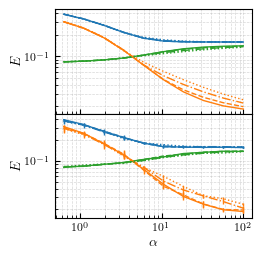

<Figure size 640x480 with 0 Axes>

In [21]:
IMG_DIRECTORY = "./Assets/effective_regularisation"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.75 * 458.63788

multiplier = 1.25
width = multiplier * 234.8775

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = ( 2.5 , 2.4 )

fig, axs = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0},
)

# print the figure size
print("Figure size: ", tuple_size)
# print the figure size
print("Figure size: ", fig.get_size_inches())

from matplotlib.pyplot import Line2D

# ICML adjustments
fig.subplots_adjust(left=0.2)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.99)
fig.subplots_adjust(right=0.99)




linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, epsilon in enumerate(epsilons):

    


    df_filtered = df.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error

    adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
    generalization_error_erm = df_filtered["generalization_error_erm"]
    boundary_error_erm = adversarial_error_erm - generalization_error_erm

    adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
    generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
    # boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std


    axs[0].plot(alphas, adversarial_error,  color="C0", linestyle=linestyles[idx])
    axs[0].plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    axs[0].plot(alphas, boundary_error,  color="C2", linestyle=linestyles[idx])

    # axs[0].errorbar(
    #     alphas,
    #     adversarial_error_erm,
    #     yerr=adversarial_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C0"
    # )
    # axs[0].errorbar(
    #     alphas,
    #     generalization_error_erm,
    #     yerr=generalization_error_erm_std,
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C1"
    # )
    # axs[0].errorbar(
    #     alphas,
    #     boundary_error_erm,
    #     # yerr=boundary_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C2"
    # )

    df_filtered = df2.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error

    adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
    generalization_error_erm = df_filtered["generalization_error_erm"]
    boundary_error_erm = adversarial_error_erm - generalization_error_erm

    adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
    generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
    # boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std


    # axs[1].plot(alphas, adversarial_error,  color="C0", linestyle=linestyles[idx])
    # axs[1].plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    # axs[1].plot(alphas, boundary_error,  color="C2", linestyle=linestyles[idx])

    axs[1].errorbar(
        alphas,
        adversarial_error_erm,
        yerr=adversarial_error_erm_std,
        
        markersize=1,
        linestyle=linestyles[idx],
        color="C0"
    )
    axs[1].errorbar(
        alphas,
        generalization_error_erm,
        yerr=generalization_error_erm_std,
        markersize=1,
        linestyle=linestyles[idx],
        color="C1"
    )
    axs[1].errorbar(
        alphas,
        boundary_error_erm,
        # yerr=boundary_error_erm_std,
        
        markersize=1,
        linestyle=linestyles[idx],
        color="C2"
    )


axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_ylabel(r"$E$", labelpad=2.0)
# axs[0].set_xlabel(r"$\alpha$", labelpad=2.0)
axs[0].grid(which="both", axis="both", alpha=0.5)
axs[0].tick_params(axis='both', which='major', direction='in')
axs[0].tick_params(axis='both', which='minor', direction='in')
# axs[0].legend(title="State Evolution", loc="lower left")

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylabel(r"$E$", labelpad=2.0)
axs[1].set_xlabel(r"$\alpha$", labelpad=2.0)
axs[1].grid(which="both", axis="both", alpha=0.5)
axs[1].tick_params(axis='both', which='major', direction='in')
axs[1].tick_params(axis='both', which='minor', direction='in')
# axs[1].legend(title="$\\boldsymbol{b}$", loc="lower left")



error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([],[], color="white"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

for idx in range(len(error_legend)):
    custom_legend.append(error_legend[idx])
    custom_legend.append(epsilon_legend[idx])

# fig.legend(handles=custom_legend, loc="upper center", ncol=4, handlelength=1.5)

save = True
if save:
    save_plot(
        fig,
        "effective_regularisation",
    )

plt.show()

plt.tight_layout()

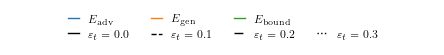

In [ ]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 4.25, 0.15*tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=4,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()

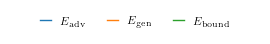

In [ ]:
custom_legend = []

custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C0", marker='o'))





# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( tuple_size[0], 0.1 * tuple_size[0]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=5,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "effective_regularisation_legend_error.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()